# A. Import libraries

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
import re
from scipy import stats as st
from scipy.stats import norm, beta
import pickle

# B. Perform Pre-processing

(21907, 186)
<class 'pandas.core.indexes.base.Index'>
175
[0 1]


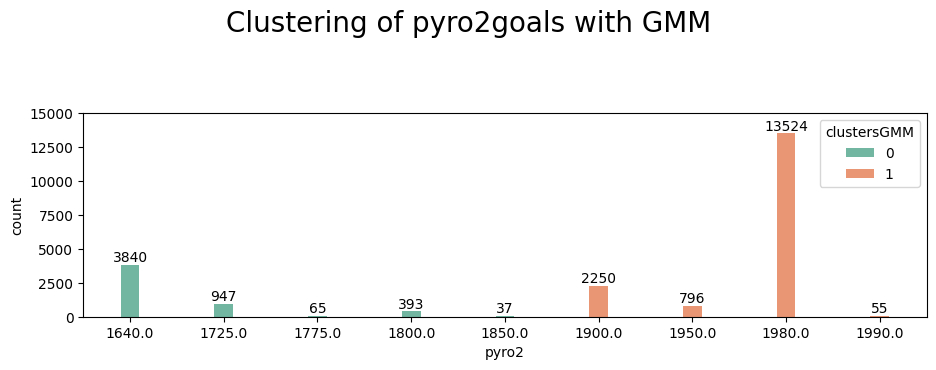

C:\Users\carlo\AppData\Local\Temp\ipykernel_18008\2516869773.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a=pd.DataFrame(modelGMM.means_,columns=["center"]).assign(label = lambda x: x.iloc[:,0].map(lambda y: "HighGoal" if y==x.max()[0] else "LowGoal")).reset_index(names="cluster")


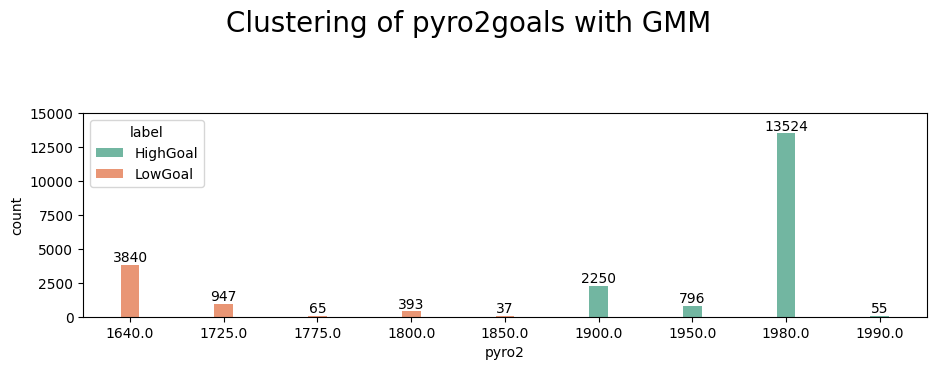

''

In [3]:
%run ./EDA1V_new.ipynb
;

# C. EDA Univariable for variables not Air/Gas related

## C.1 Numerical vars

In [4]:
# Numeric variable .description() check
# 
# min/max vs quantiles, mean, and standard deviation – looking for outliers/sensible results
# 
# Distribution plot examination
# 
# can use .hist() command or a more customized subplot group or for-each loop to plot a seperate histogram of each variable

In [36]:
print(dfXY.shape)
dfXY.head(3)

(21907, 186)


AP1_FurnaceThickness  AP1_FurnaceWidth  \
ts                                                            
2024-05-09 08:40:00                  0.04              61.0   
2024-05-09 08:42:00                  0.04              61.0   
2024-05-09 08:44:00                  0.04              61.0   

                     AP1_FurnaceCombustionAirPressureCV  \
ts                                                        
2024-05-09 08:40:00                               100.0   
2024-05-09 08:42:00                               100.0   
2024-05-09 08:44:00                               100.0   

                     AP1_FurnaceCombustionAirPressureFeedback  \
ts                                                              
2024-05-09 08:40:00                                  1.014615   
2024-05-09 08:42:00                                  0.956586   
2024-05-09 08:44:00                                  0.912703   

                     AP1_FurnaceCombustionAirPressureSetPoint  \
ts                                                              
2024-05-09 08:40:00                                       2.0   
2024-05-09 08:42:00                                       2.0   
2024-05-09 08:44:00                                       2.0   

                     AP1_FurnaceCombustionAirTempFurnace  \
ts                                                         
2024-05-09 08:40:00                           373.529572   
2024-05-09 08:42:00                           378.090790   
2024-05-09 08:44:00                           387.829865   

                     AP1_FurnaceDilutionAirTemperatureCV  \
ts                                                         
2024-05-09 08:40:00                                  0.0   
2024-05-09 08:42:00                                  0.0   
2024-05-09 08:44:00                                  0.0   

                     AP1_FurnaceDilutionAirTemperatureFeedback  \
ts                                                               
2024-05-09 08:40:00                                 370.505768   
2024-05-09 08:42:00                                 374.100006   
2024-05-09 08:44:00                                 383.867920   

                     AP1_FurnaceDilutionAirTemperatureSetPoint  \
ts                                                               
2024-05-09 08:40:00                                     1700.0   
2024-05-09 08:42:00                                     1700.0   
2024-05-09 08:44:00                                     1700.0   

                     AP1_FurnaceLineSpeed  ...  \
ts                                         ...   
2024-05-09 08:40:00            124.969482  ...   
2024-05-09 08:42:00            124.969482  ...   
2024-05-09 08:44:00            125.030533  ...   

                     AP1_FurnaceZone8TopGasFlowFeedback  \
ts                                                        
2024-05-09 08:40:00                            5.960705   
2024-05-09 08:42:00                            5.910838   
2024-05-09 08:44:00                            5.921523   

                     AP1_FurnaceZone8TopTemp  AP1_FurnaceZone8TurndownOn  \
ts                                                                         
2024-05-09 08:40:00              2013.073486                           0   
2024-05-09 08:42:00              2042.722168                           0   
2024-05-09 08:44:00              2061.698975                           0   

                     CurrentGuage  CurrentWidth  CoilLength  NetWeight  grade  \
ts                                                                              
2024-05-09 08:40:00          0.04       61.4117      8090.3    69160.0    120   
2024-05-09 08:42:00          0.04       61.4117      8090.3    69160.0    120   
2024-05-09 08:44:00          0.04       61.4117      8090.3    69160.0    120   

                      pyro2  SteelFamCluster  
ts                                            
2024-05-09 08:40:00  1980.0         HighGoal  
2024-05-09 08:42:0

In [6]:
#Numeric vars
numerical_var_series=dfXY[dfXY.columns[dfXY.dtypes == np.float64]].columns#.to_list()#[0:5]
print(type(numerical_var_series))
print(len(numerical_var_series))
numerical_var_series

<class 'pandas.core.indexes.base.Index'>
175


Index(['AP1_FurnaceThickness', 'AP1_FurnaceWidth',
       'AP1_FurnaceCombustionAirPressureCV',
       'AP1_FurnaceCombustionAirPressureFeedback',
       'AP1_FurnaceCombustionAirPressureSetPoint',
       'AP1_FurnaceCombustionAirTempFurnace',
       'AP1_FurnaceDilutionAirTemperatureCV',
       'AP1_FurnaceDilutionAirTemperatureFeedback',
       'AP1_FurnaceDilutionAirTemperatureSetPoint', 'AP1_FurnaceLineSpeed',
       ...
       'AP1_FurnaceZone8TopAirGasRatioActual',
       'AP1_FurnaceZone8TopAirGasRatioSetpoint',
       'AP1_FurnaceZone8TopGasFlowControlValveOutput',
       'AP1_FurnaceZone8TopGasFlowFeedback', 'AP1_FurnaceZone8TopTemp',
       'CurrentGuage', 'CurrentWidth', 'CoilLength', 'NetWeight', 'pyro2'],
      dtype='object', length=175)

In [7]:
#Create the different groups of columns to plot
proceso_vars_series=dfXY[numerical_var_series[(~numerical_var_series.str.contains("AP1_Furnace",regex=False)) & (~numerical_var_series.str.contains("pyro2",regex=False))]].columns#.head(1)
zoneTemp_vars_series=dfXY[numerical_var_series[numerical_var_series.str.contains(".*Zone.*Temp.*",regex=True)]].columns#.head(1)

zoneAirGas_vars_series=dfXY[numerical_var_series[numerical_var_series.str.contains(".*Zone.*Air.*|.*Zone.*Gas.*",regex=True)]].columns#.head(1)

recuperator_vars_series=dfXY[numerical_var_series[numerical_var_series.str.contains("AP1_Furnace.*Dilution|Recuperator|RWP|Combustion.*",regex=True)]].columns#.head(1)

pyro_vars_series=dfXY[numerical_var_series[numerical_var_series.str.contains(".*pyro.*|.*Pyro.*",regex=True)]].columns#.head(1)

rest_vars_series=dfXY[[var for var in numerical_var_series.to_list() if var not in proceso_vars_series.to_list() and var not in zoneTemp_vars_series.to_list() and var not in zoneAirGas_vars_series.to_list() and var not in recuperator_vars_series.to_list() and var not in pyro_vars_series.to_list()]].columns#.head(1)

In [8]:
#Plot histograms
#dfXY[dfXY.columns[dfXY.dtypes == np.float64]].hist(figsize=(20,10))#Too many vars: 175
print("There are {} numerical vars".format(dfXY[dfXY.columns[dfXY.dtypes == np.float64]].shape))
print("There are {} numerical vars of tbl proceso".format(len(proceso_vars_series)))
print("There are {} numerical vars of zone temp".format(len(zoneTemp_vars_series)))
print("There are {} numerical vars of zone air/gas flow".format(len(zoneAirGas_vars_series)))
print("There are {} numerical vars of recuperator".format(len(recuperator_vars_series)))
print("There are {} numerical vars of pyro".format(len(pyro_vars_series)))
print("The rest of numerical vars of furnace are {} ".format(len(rest_vars_series)))

if dfXY[dfXY.columns[dfXY.dtypes == np.float64]].shape[1]==len(proceso_vars_series)+len(zoneTemp_vars_series)+len(zoneAirGas_vars_series)+len(recuperator_vars_series)+len(pyro_vars_series)+len(rest_vars_series):
    print("All groups sum total length")

There are (21907, 175) numerical vars
There are 4 numerical vars of tbl proceso
There are 20 numerical vars of zone temp
There are 126 numerical vars of zone air/gas flow
There are 11 numerical vars of recuperator
There are 3 numerical vars of pyro
The rest of numerical vars of furnace are 11 
All groups sum total length


### C.1.1 Plot proceso vars: 4

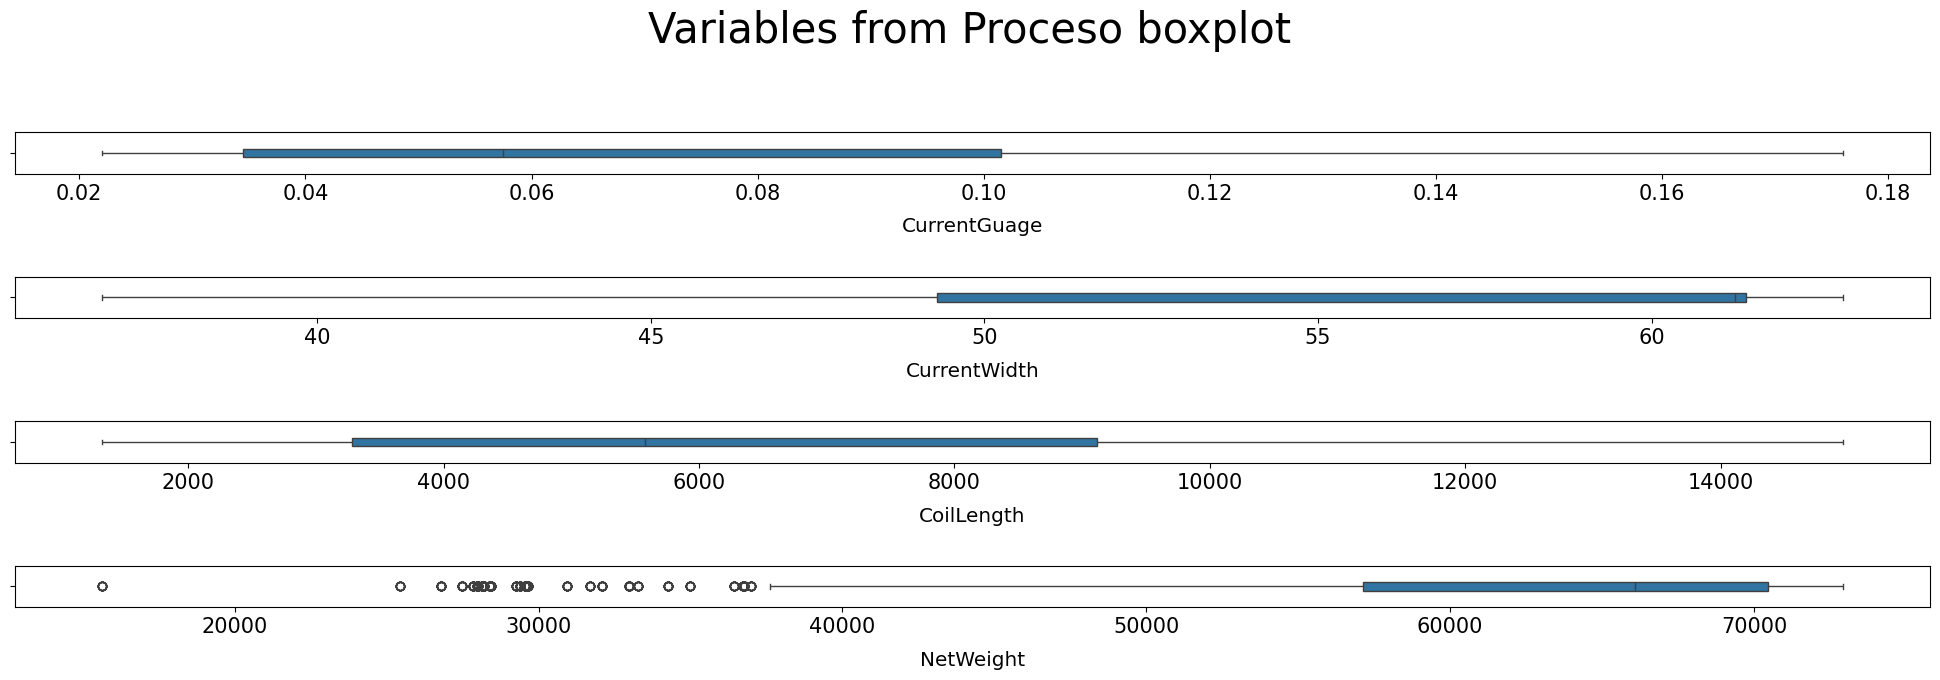

In [9]:
#Plot proceso boxplot: 4 vars

fig,axes = plt.subplots(4,1,figsize=(20,7))
sns.boxplot(data=dfXY[proceso_vars_series[0]],orient='h',ax=axes[0],width=0.2)#,width=0.2
axes[0].set_xlabel(xlabel=proceso_vars_series[0],labelpad=10,fontsize="x-large")
axes[0].tick_params(axis='x', labelsize=15)
sns.boxplot(data=dfXY[proceso_vars_series[1]],orient='h',ax=axes[1],width=0.2)#,width=0.2
axes[1].set_xlabel(xlabel=proceso_vars_series[1],labelpad=10,fontsize="x-large")
axes[1].tick_params(axis='x', labelsize=15)
sns.boxplot(data=dfXY[proceso_vars_series[2]],orient='h',ax=axes[2],width=0.2)#,width=0.2
axes[2].set_xlabel(xlabel=proceso_vars_series[2],labelpad=10,fontsize="x-large")
axes[2].tick_params(axis='x', labelsize=15)
sns.boxplot(data=dfXY[proceso_vars_series[3]],orient='h',ax=axes[3],width=0.2)#,width=0.2
axes[3].set_xlabel(xlabel=proceso_vars_series[3],labelpad=10,fontsize="x-large")
axes[3].tick_params(axis='x', labelsize=15)
fig.suptitle("Variables from Proceso boxplot",fontsize=30,y=1)
#axes.set_xlim(0,4)
#zone0_fg.map(sns.boxplot)
sns.set_context('paper')
fig.tight_layout(pad=3)

In [10]:
#Define func hist plot rest vars
def func_hist_plot_rest(vars_series:pd.Series,title:str,ncol:int,hue:str=None,colour:str="olive"):
    ncol=ncol
    nrow=dfXY[vars_series].shape[1]//ncol+1
    var=0
    
    fig,axes = plt.subplots(nrow,ncol,figsize=(20,nrow*20/5))
    fig.suptitle(f"Distribution of numerical variables from {title}",fontsize=30)
    
    for r in range(nrow):
        for c in range(ncol):
            if var<len(vars_series.to_list()):
                if re.search(r'.*Total.*',vars_series[var]):
                    sns.histplot(data=dfXY,x=vars_series[var],ax=axes[r,c],kde=True,color=colour,hue=hue)
                else:
                    if len(dfXY[vars_series[var]].unique())>1:
                        sns.histplot(data=dfXY,x=vars_series[var],ax=axes[r,c],kde=True,color=colour,hue=hue)
                    else:
                        sns.histplot(data=dfXY,x=vars_series[var],ax=axes[r,c],color=colour,hue=hue)
                axes[r,c].set_title(label=vars_series[var],loc='center',pad=10,fontsize="x-large")
                axes[r,c].set_xlabel(xlabel="",labelpad=10)
                axes[r,c].set_ylabel(ylabel="",labelpad=15)
                axes[r,c].axvline(tbl_desc.loc['cut-',vars_series[var]], color="red", dashes=(6, 2)) #Cut-
                axes[r,c].axvline(tbl_desc.loc['cut+',vars_series[var]], color="red", dashes=(6, 2)) #Cut+
                axes[r,c].tick_params(axis='x', labelsize=15)
                axes[r,c].tick_params(axis='y', labelsize=15)
                var+=1
                if c==0:
                    axes[r,c].set_ylabel(ylabel="Counts",labelpad=15,fontsize="large")
            #remove unused axes
            #This method removes subplots with hist of vars that have a unique value
            # if not axes[r,c].lines: #ax.lines is a matplotlib.axes._base._AxesBase.ArtistList,tells u number of lines in the subplot, if 0 then is empty
            #     axes[r,c].set_visible(False)
            #print(len(axes[r,c].get_children()))
            if len(axes[r,c].get_children()) <=10:#empty plots have 10 children
                axes[r,c].set_visible(False)
    
    
    # for ax in axes.flatten(): #axes.flatten() is a np.array of matplotlib.axes._axes.Axes
    #     if not ax.lines: #ax.lines is a matplotlib.axes._base._AxesBase.ArtistList,tells u number of lines in the subplot, if 0 then is empty
    #         ax.set_visible(False)
    
    #Keep outer labels
    # for ax in fig.get_axes():
    #     ax.label_outer()
    
    #Make space between subplots
    fig.tight_layout(pad=3)

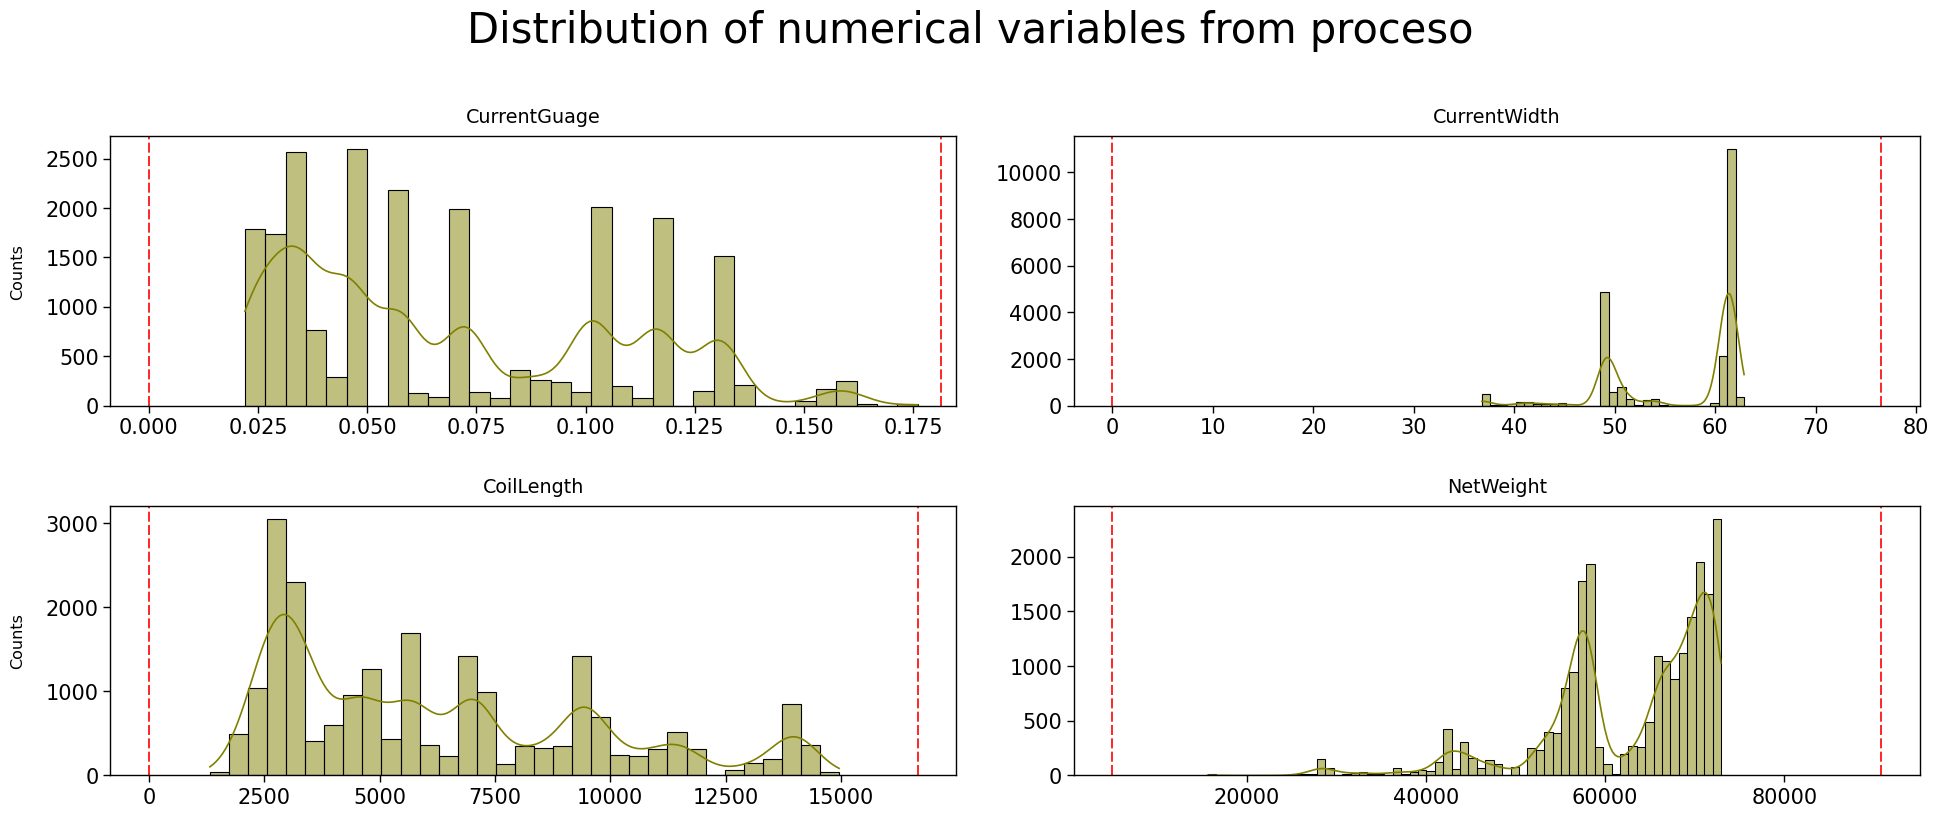

In [11]:
#Plot proceso: 4 vars
func_hist_plot_rest(vars_series=proceso_vars_series,title="proceso",ncol=2,hue=None,colour="olive")
#NOTES: CurrentWidth and NetWeight bimodal maybe bc widthID

### C.1.2 Plot zone temp: 20 vars

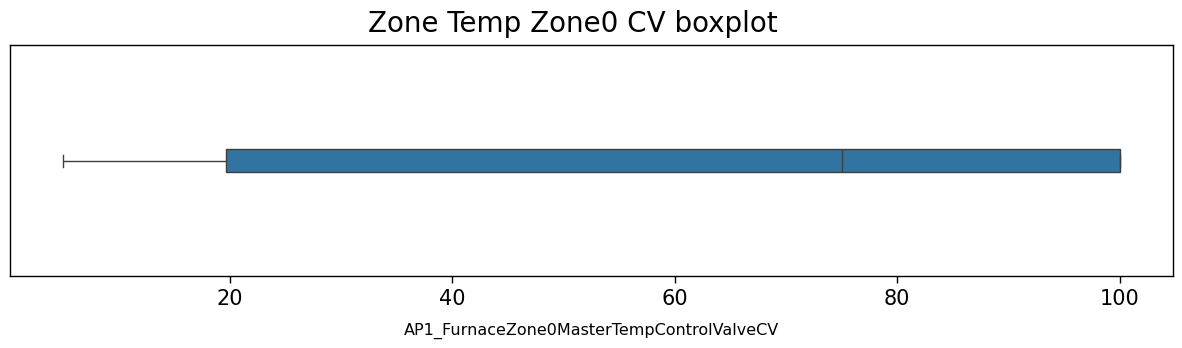

In [12]:
#Plot bosplot zone temp: 20 vars

fig,axes = plt.subplots(figsize=(15,3))
sns.boxplot(data=dfXY[zoneTemp_vars_series[zoneTemp_vars_series.str.contains("CV",regex=False)]],orient='h',ax=axes,width=0.1)
axes.set_xlabel(xlabel=zoneTemp_vars_series[zoneTemp_vars_series.str.contains("CV",regex=False)][0],labelpad=10,fontsize="large")
axes.tick_params(axis='x', labelsize=15)
fig.suptitle("Zone Temp Zone0 CV boxplot",fontsize=20,y=1)
#axes.set_xlim(0,4)
#zone0_fg.map(sns.boxplot)
sns.set_context('paper')
#Remove ylabel
#axes.set_ylabel(ylabel='')
#plt.setp(axes, ylabel="")
#axes.set(ylabel=None)
#plt.yticks("")
axes.yaxis.set_major_locator(ticker.NullLocator())

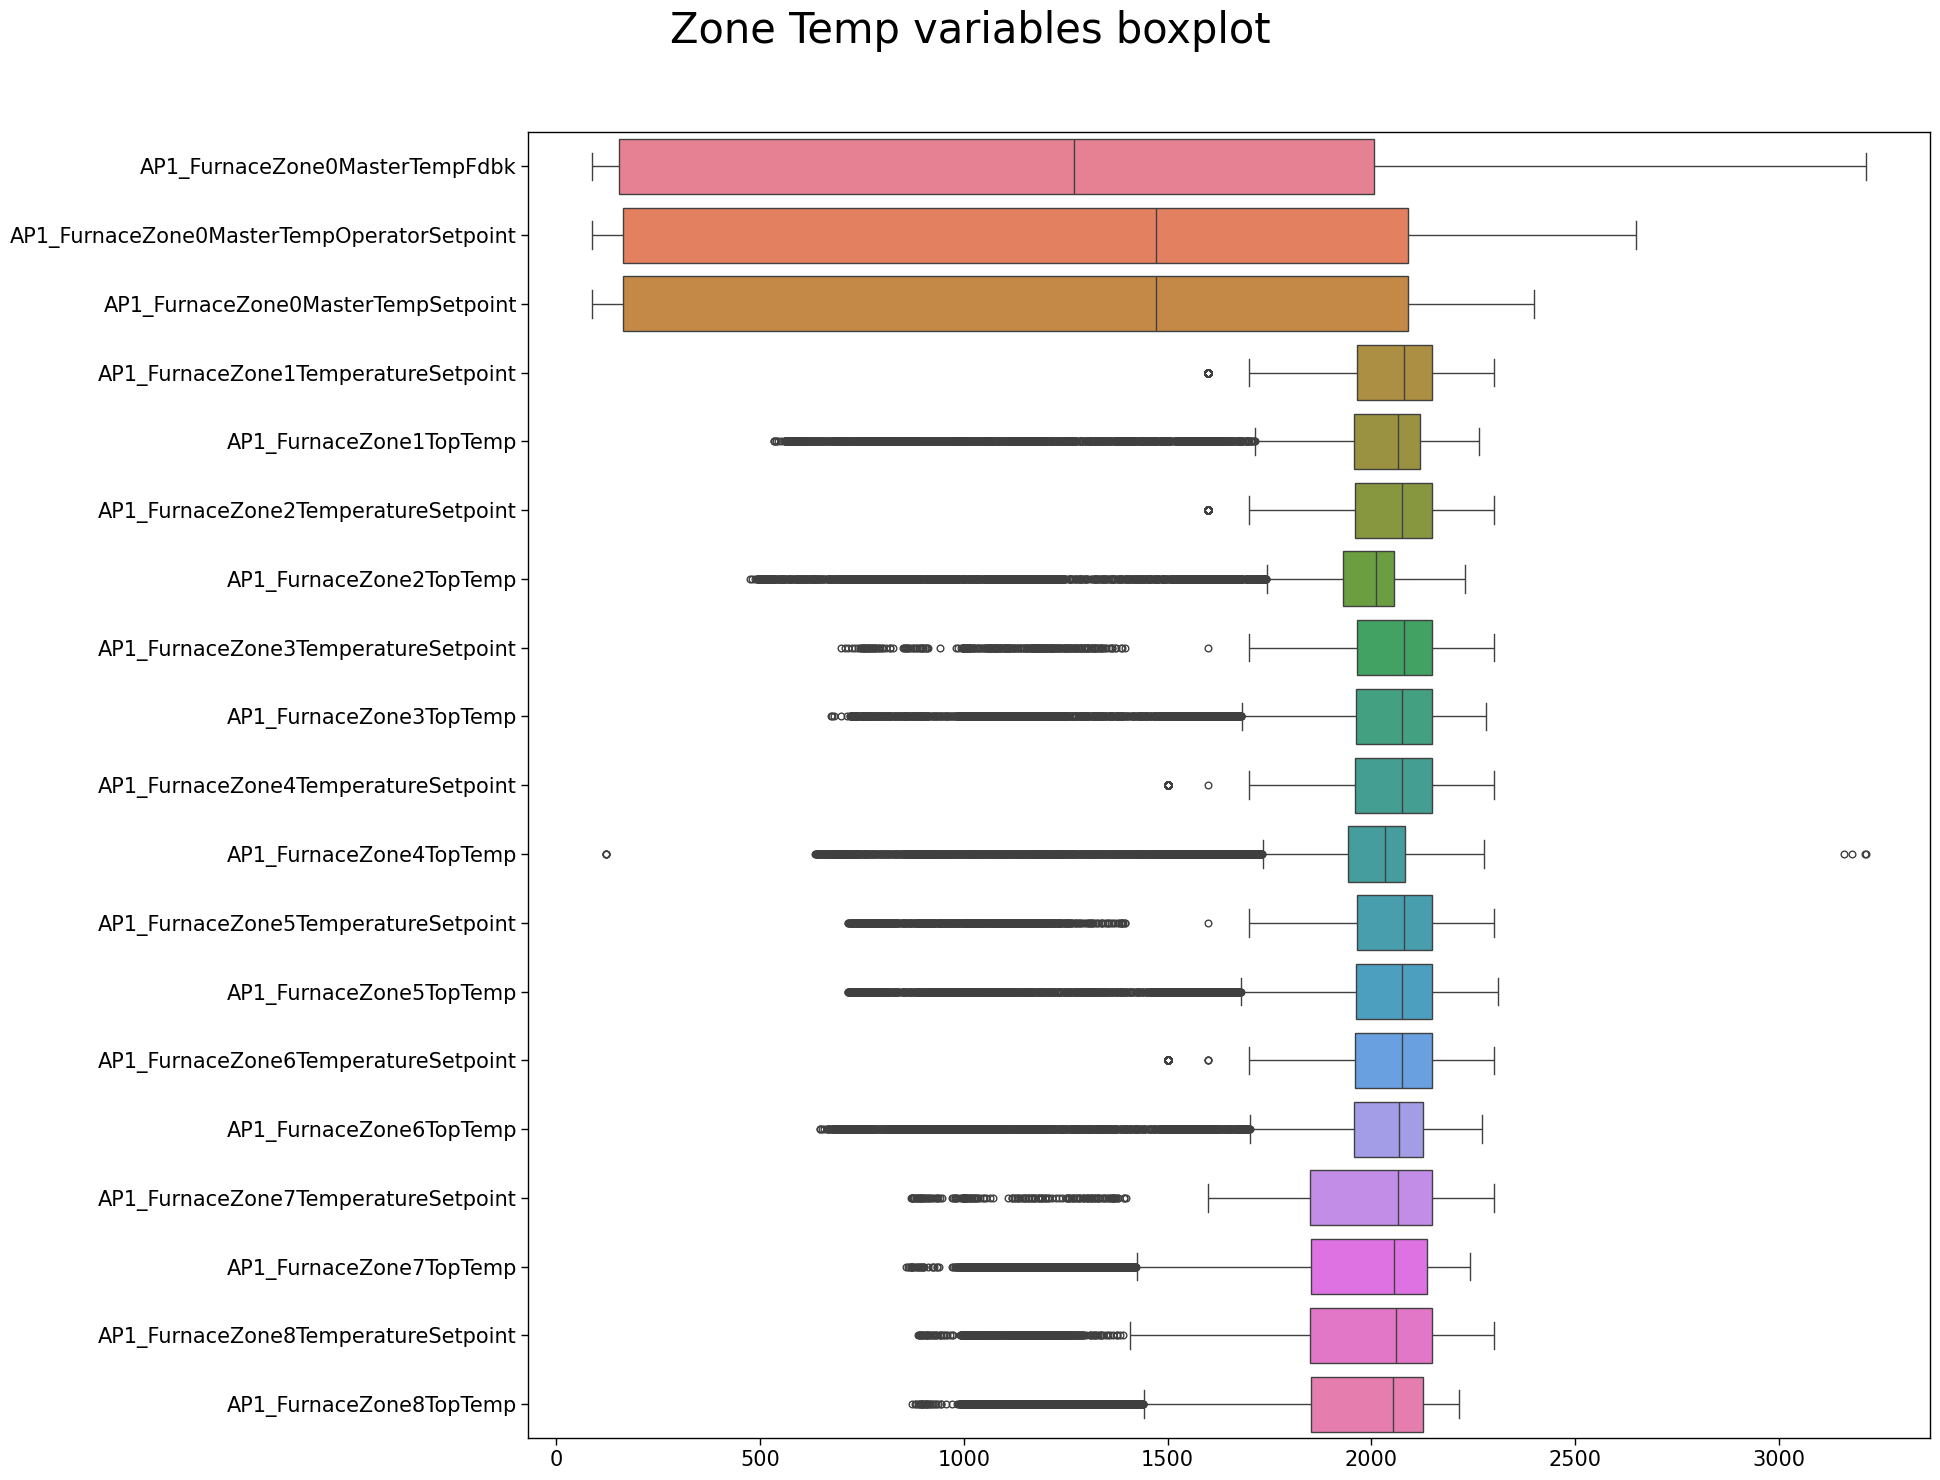

In [13]:
#Plot bosplot zone temp: 20 vars
fig,axes = plt.subplots(figsize=(20,15))
sns.boxplot(data=dfXY[zoneTemp_vars_series[~zoneTemp_vars_series.str.contains("CV",regex=False)]],orient='h',ax=axes)
axes.tick_params(axis='x', labelsize=15)
axes.tick_params(axis='y', labelsize=15)
fig.suptitle("Zone Temp variables boxplot",fontsize=30,y=1)
#axes.set_xlim(0,4)
#zone0_fg.map(sns.boxplot)
sns.set_context('paper', rc={"axes.labelsize":10})
#sns.set(font_scale=1)
fig.tight_layout(pad=3)

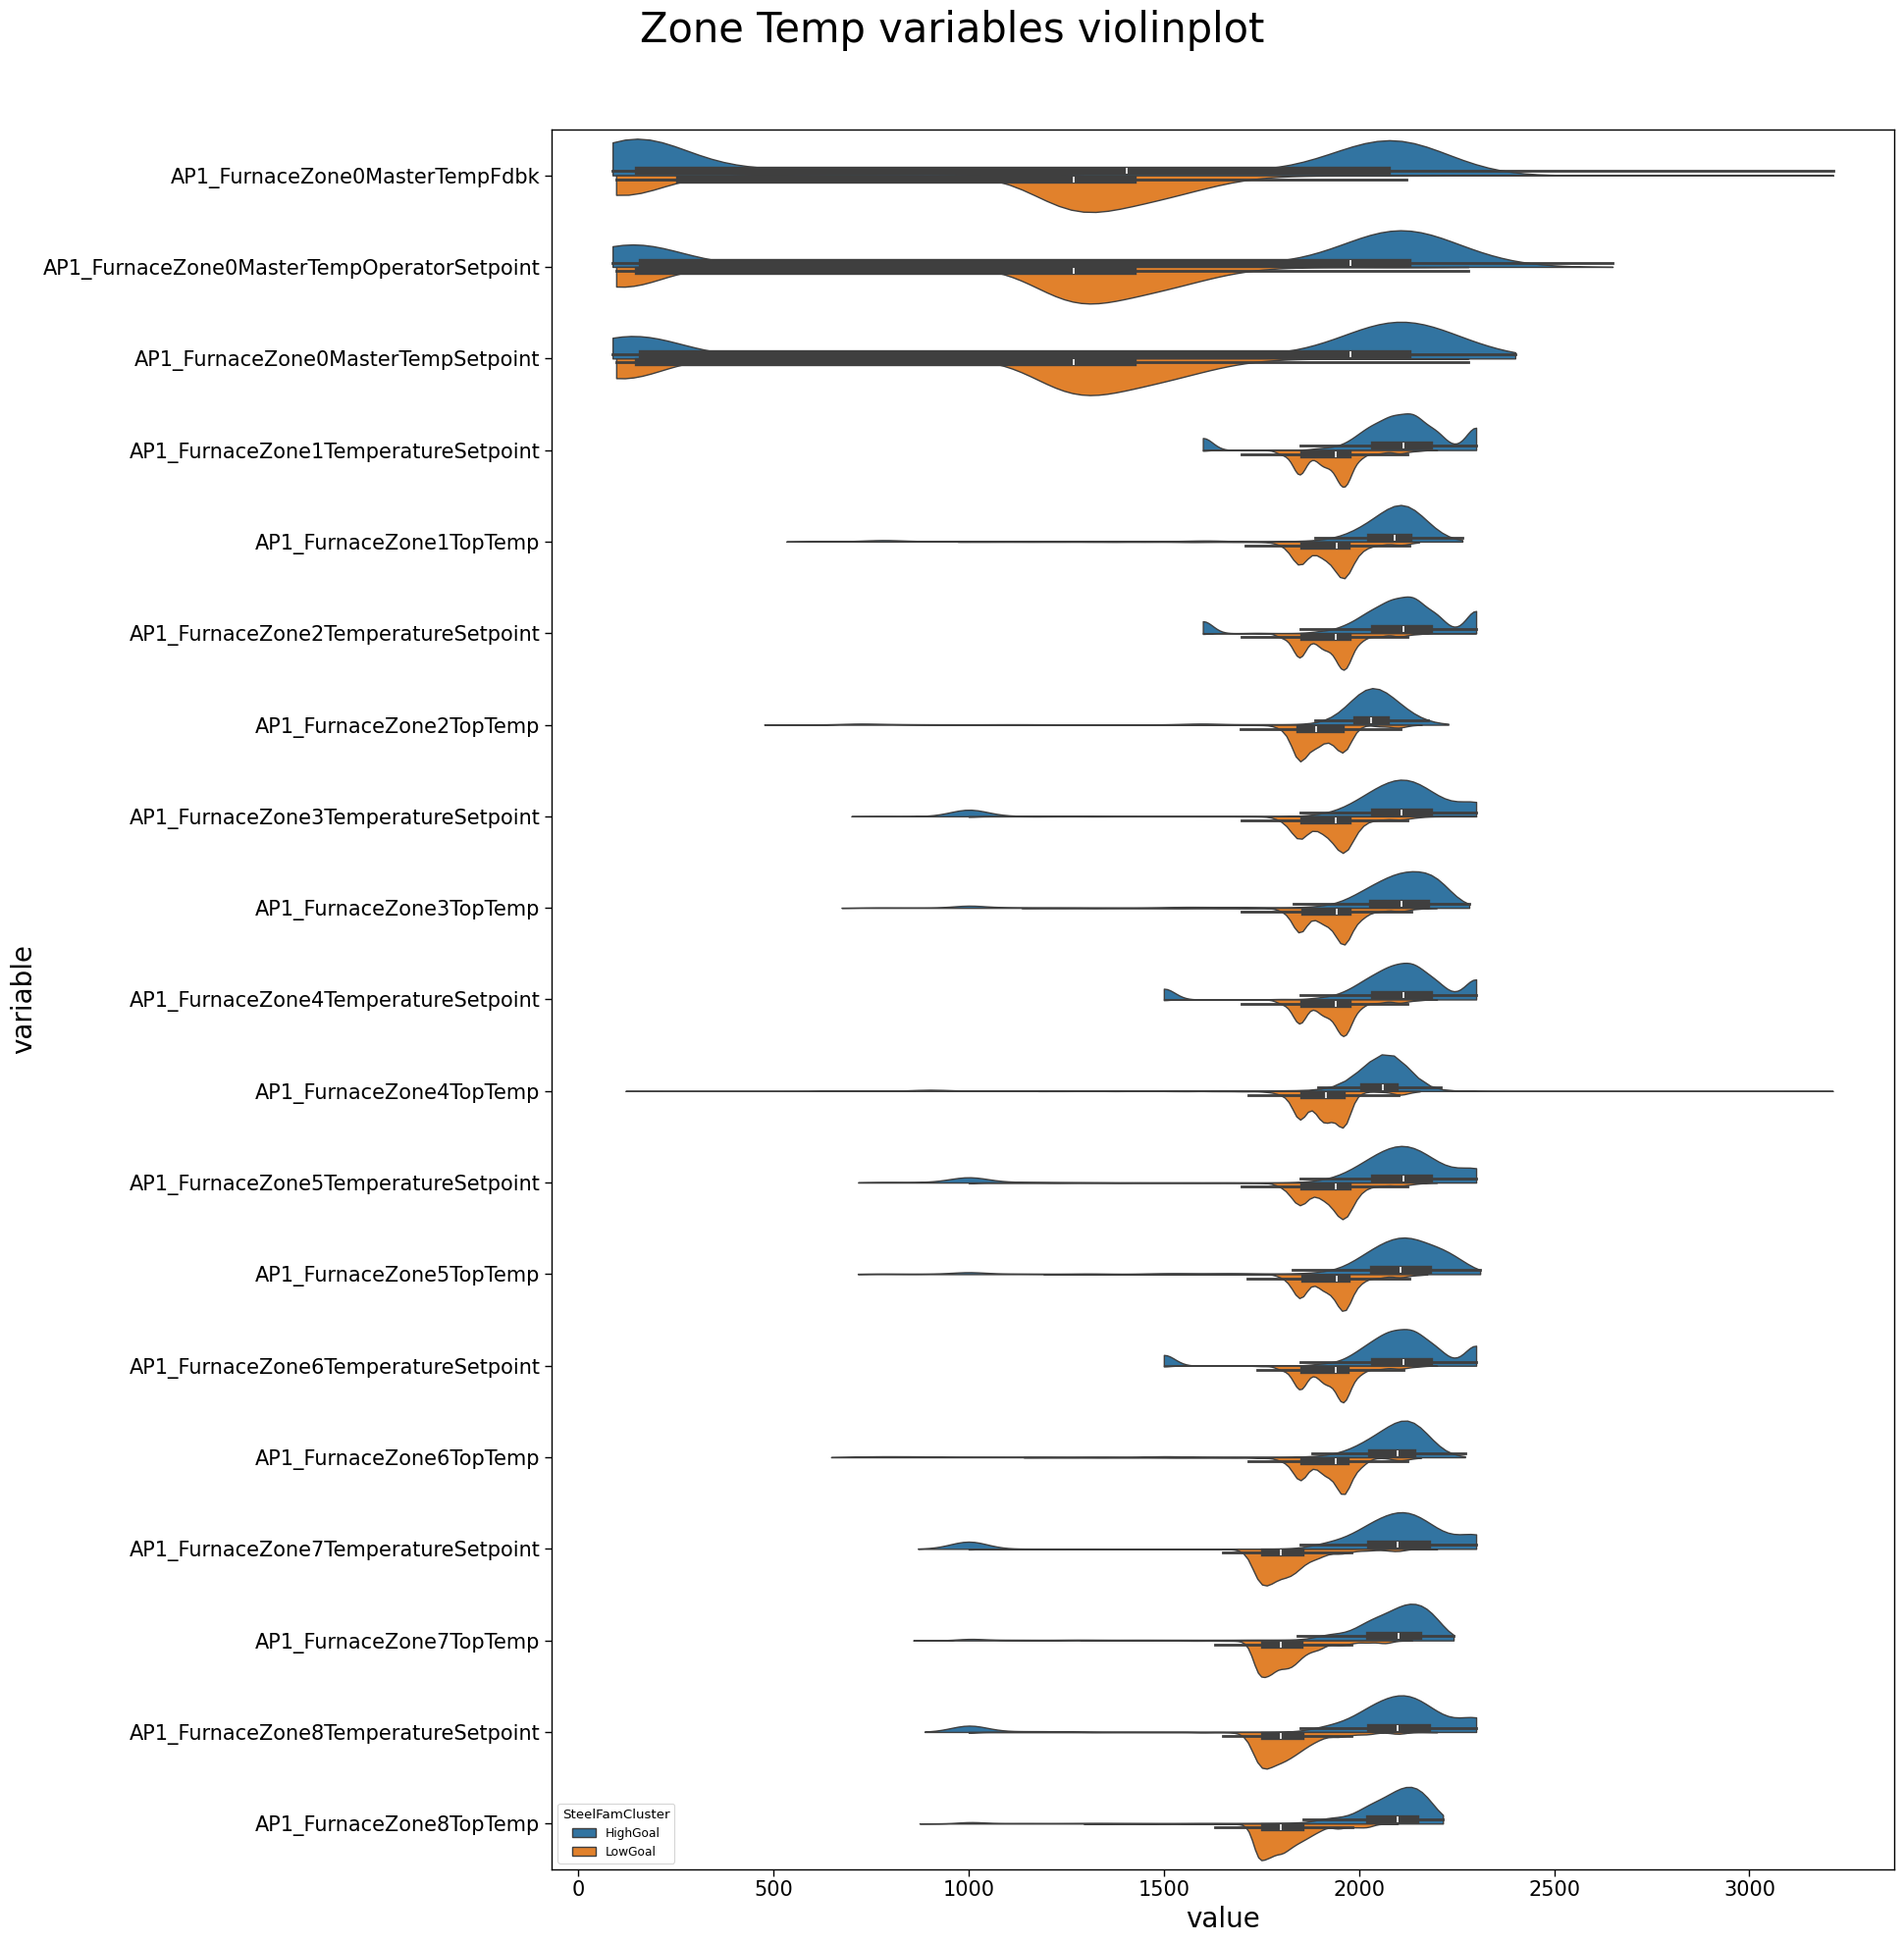

In [14]:
#Plot violinplot zone temp: 20 vars
fig,axes = plt.subplots(figsize=(20,20))
sns.violinplot(data=pd.melt(dfXY[zoneTemp_vars_series[~zoneTemp_vars_series.str.contains("CV",regex=False)].tolist()+["SteelFamCluster"]].reset_index(),id_vars=["ts","SteelFamCluster"]),orient='h',ax=axes,x="value",y="variable",hue="SteelFamCluster",split=True,cut=0,inner_kws=dict(box_width=6, whis_width=2),density_norm="count")#,hue="SteelFamCluster"
axes.tick_params(axis='x', labelsize=15)
axes.tick_params(axis='y', labelsize=15)
axes.set_xlabel("value",fontsize=20)
axes.set_ylabel("variable",fontsize=20)
fig.suptitle("Zone Temp variables violinplot",fontsize=30,y=1)
#axes.set_xlim(0,4)
#zone0_fg.map(sns.boxplot)
sns.set_context('paper')
#sns.set(font_scale=1)
fig.tight_layout(pad=3)

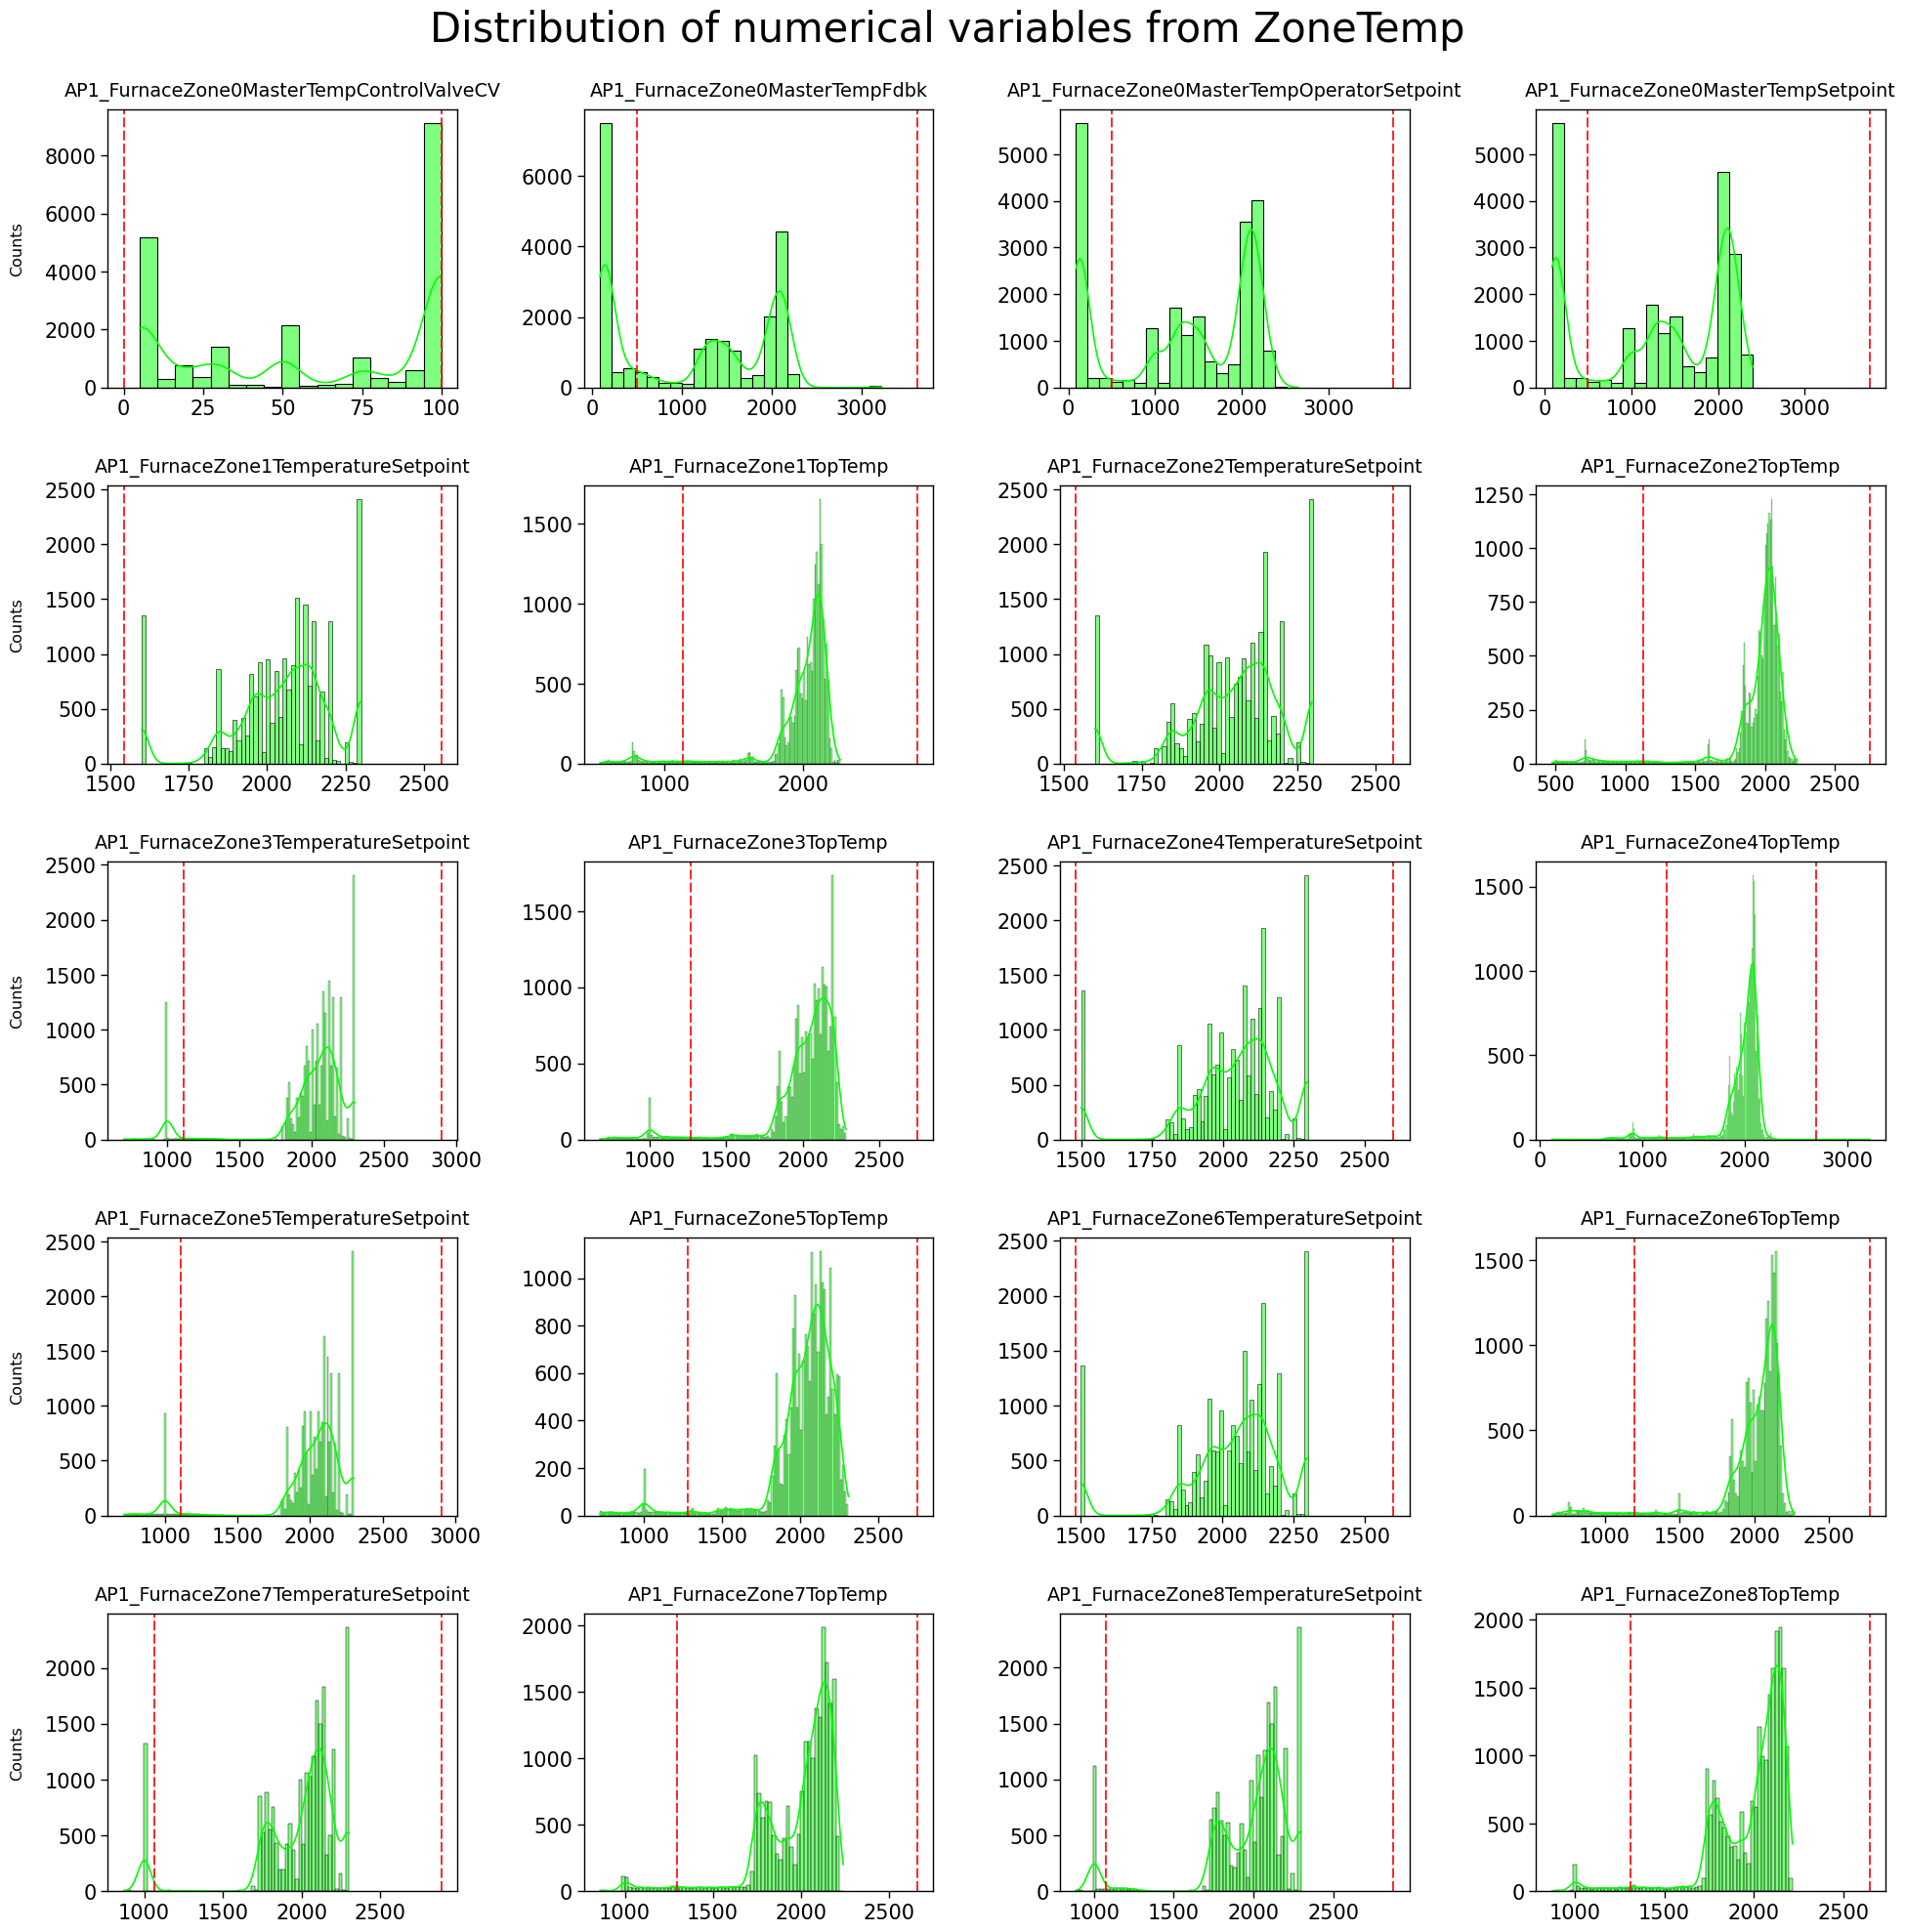

In [15]:
#Plot zone temp: 20 vars  
func_hist_plot_rest(vars_series=zoneTemp_vars_series,title="ZoneTemp",ncol=4,colour="lime")
#NOTES: bimodal maybe bc steelgradefamily. pyro2goals are clustered by steelgradefam, so use pyro2goals to make famID and use it as hue with thermocouples

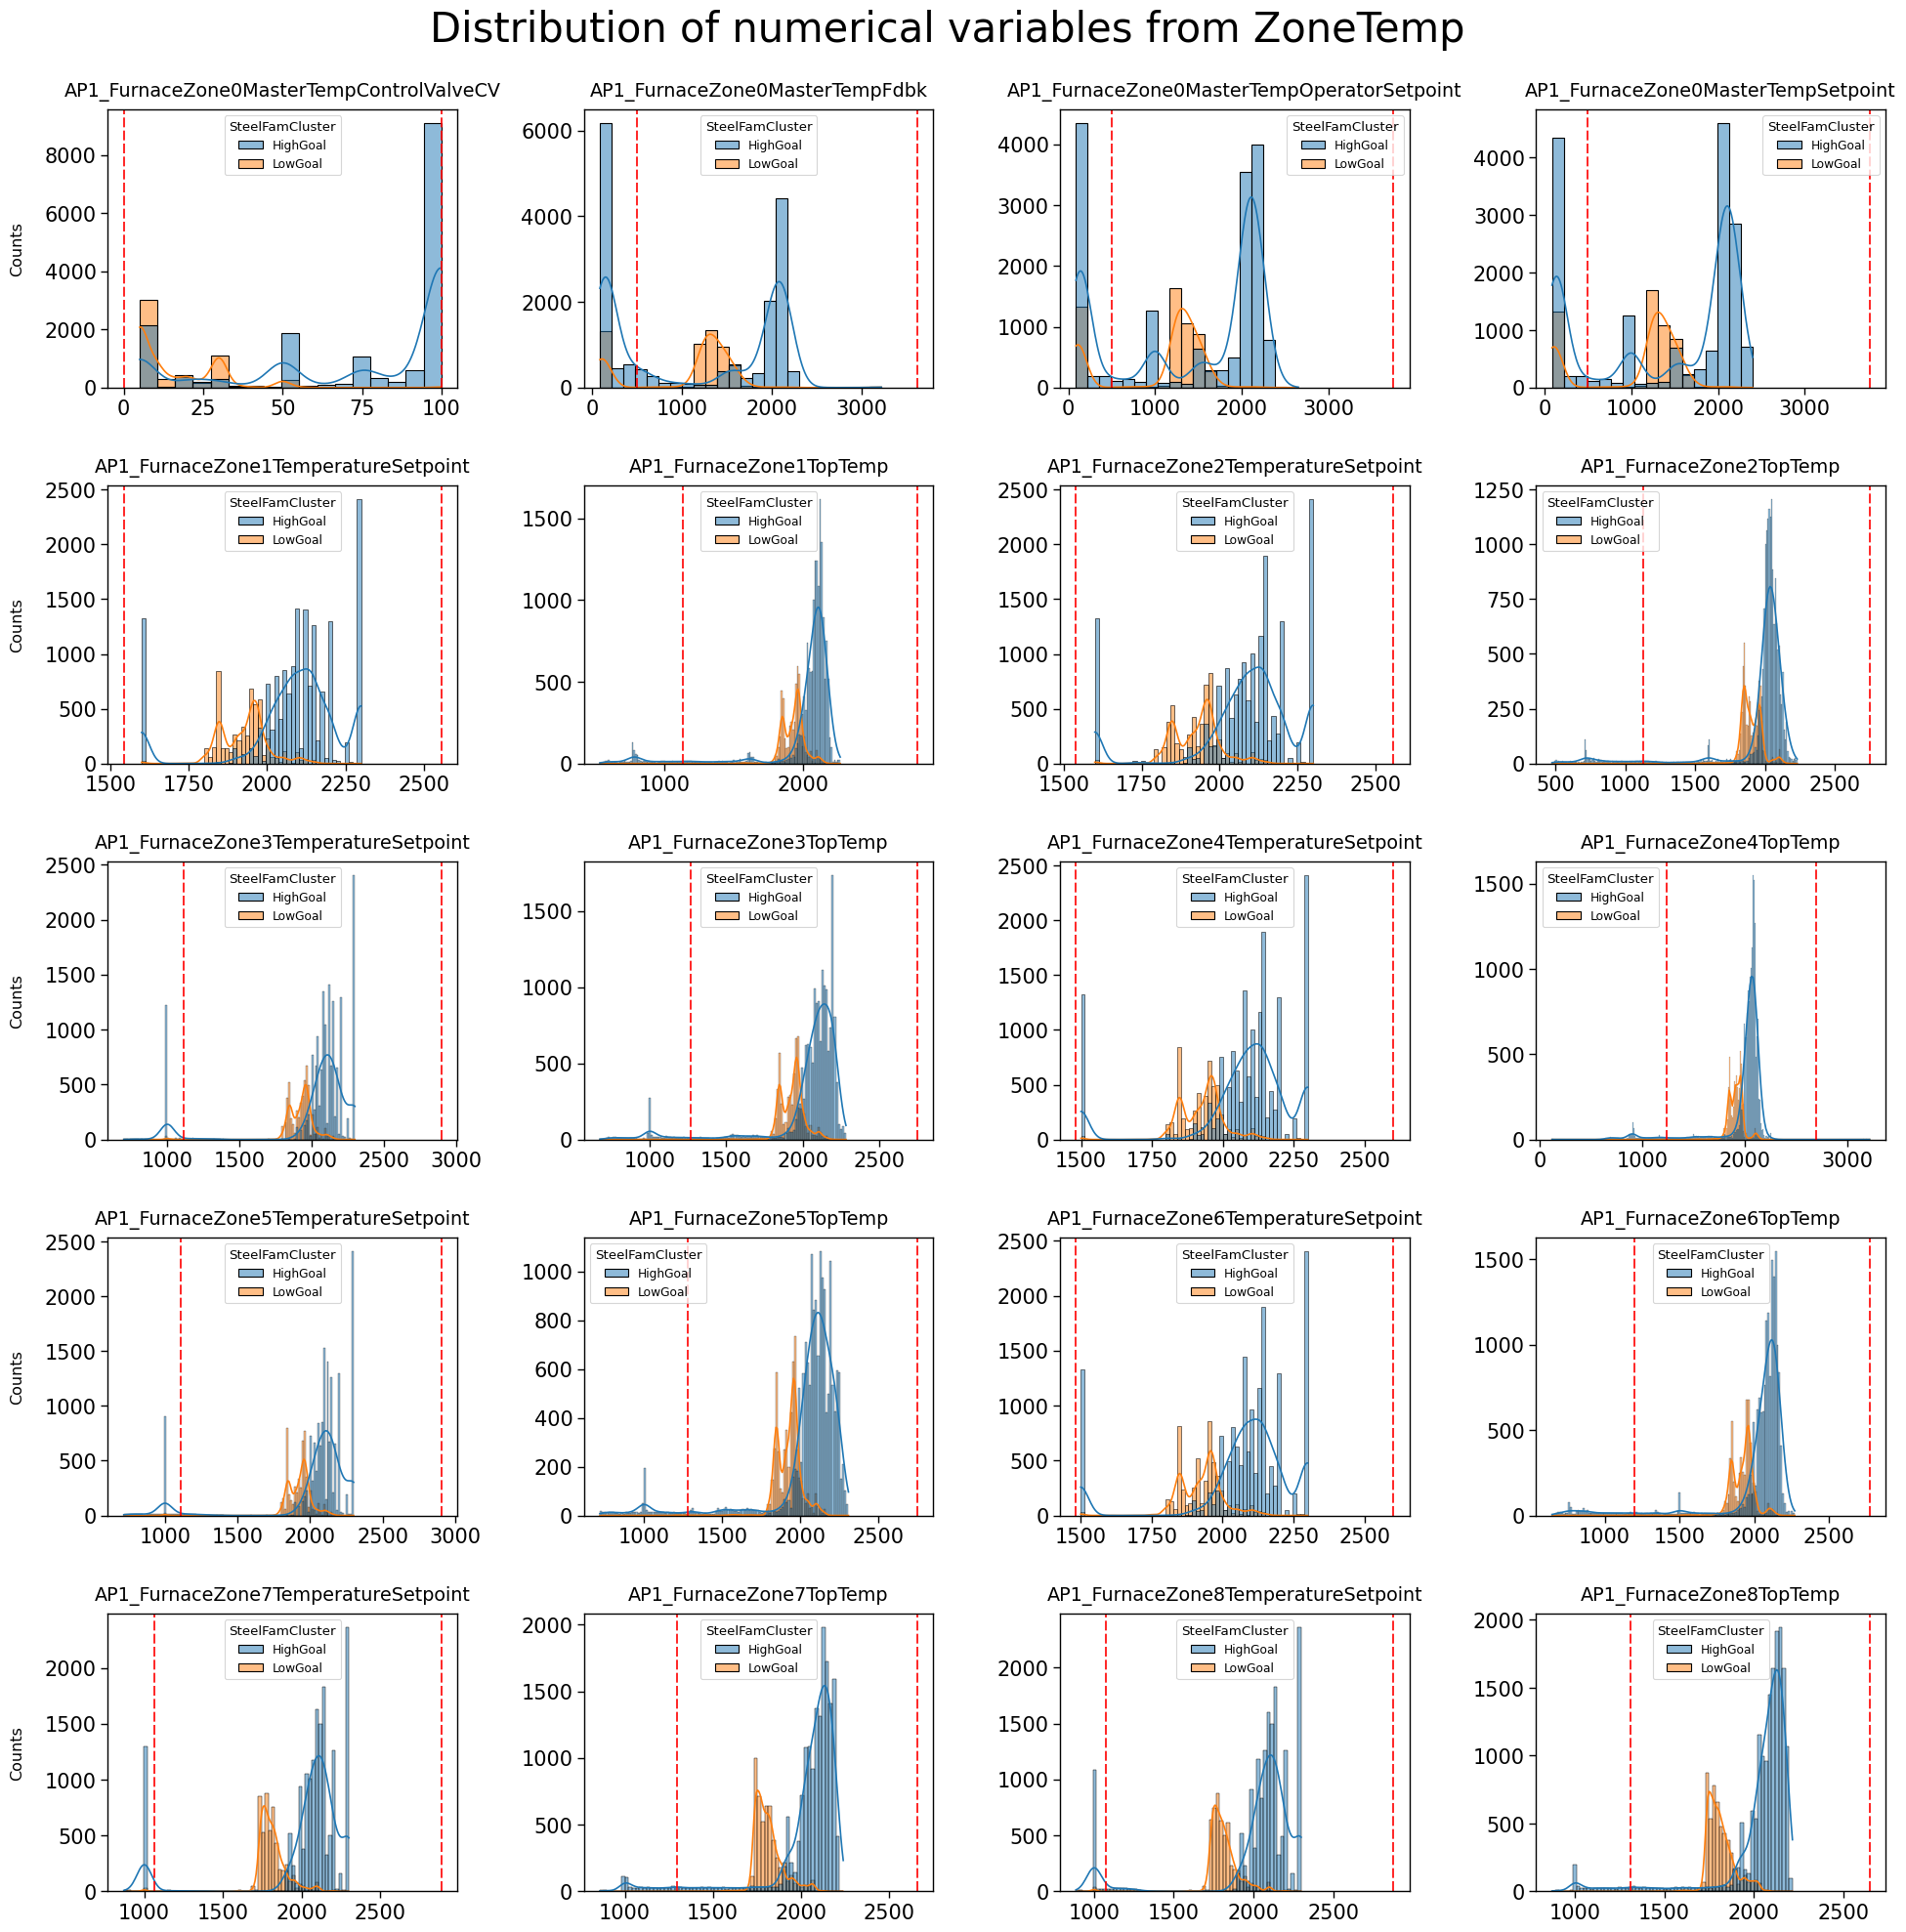

In [16]:
#Plot zone temp by hue=pyro2Clusters(sort of steelgradefam clusters): 20 vars
func_hist_plot_rest(vars_series=zoneTemp_vars_series,title="ZoneTemp",ncol=4,hue="SteelFamCluster")
#NOTES: bimodal maybe bc steelgradefamily. pyro2goals are clustered by steelgradefam, so use pyro2goals to make famID and use it as hue with thermocouples

In [17]:
tbl_desc[zoneTemp_vars_series[~zoneTemp_vars_series.str.contains("CV",regex=False)]]

AP1_FurnaceZone0MasterTempFdbk  \
count                    21907.000000   
mean                      1111.371460   
std                        834.903469   
min                         87.746613   
25%                        154.445892   
50%                       1270.196411   
75%                       2005.619080   
max                       3214.649414   
cut-                       500.000000   
cut+                      3616.081866   

       AP1_FurnaceZone0MasterTempOperatorSetpoint  \
count                                21907.000000   
mean                                  1308.414041   
std                                    813.129664   
min                                     87.746613   
25%                                    164.139359   
50%                                   1471.091064   
75%                                   2090.000000   
max                                   2649.661865   
cut-                                   500.000000   
cut+                                  3747.803033   

       AP1_FurnaceZone0MasterTempSetpoint  \
count                        21907.000000   
mean                          1308.398844   
std                            813.107316   
min                             87.746613   
25%                            164.139359   
50%                           1471.091064   
75%                           2090.000000   
max                           2400.000000   
cut-                           500.000000   
cut+                          3747.720793   

       AP1_FurnaceZone1TemperatureSetpoint  AP1_FurnaceZone1TopTemp  \
count                         21907.000000             21907.000000   
mean                           2049.582782              1976.528751   
std                             168.764710               281.491461   
min                            1600.000000               532.962585   
25%                            1965.000000              1957.567810   
50%                            2080.000000              2065.240723   
75%                            2150.000000              2120.088013   
max                            2300.000000              2264.609863   
cut-                           1543.288652              1132.054368   
cut+                           2555.876911              2821.003135   

       AP1_FurnaceZone2TemperatureSetpoint  AP1_FurnaceZone2TopTemp  \
count                         21907.000000             21907.000000   
mean                           2048.405076              1936.201335   
std                             169.608241               269.995194   
min                            1600.000000               476.355804   
25%                            1960.000000              1929.725525   
50%                            2075.000000              2012.061035   
75%                            2150.000000              2054.467163   
max                            2300.000000              2228.697510   
cut-                           1539.580354              1126.215753   
cut+                           2557.229798              2746.186916   

       AP1_FurnaceZone3TemperatureSetpoint  AP1_FurnaceZone3TopTemp  \
count                         21907.000000             21907.000000   
mean                           2005.914419              2009.948279   
std                             297.821238               246.498653   
min                             699.403687               674.193298   
25%                            1965.000000              1962.454712   
50%                            2080.000000              2075.312500   
75%                            2150.000000              2149.718872   
max                            2300.000000              2282.197266   
cut-                           1112.450704              1270.452319   
cut+                           2899.378134              2749.444238   

       AP1_FurnaceZone4TemperatureSetpoint  AP1_FurnaceZone4TopTemp  \
count                         21907.000000             219

### C.1.3 Plot recuperator: 11 vars

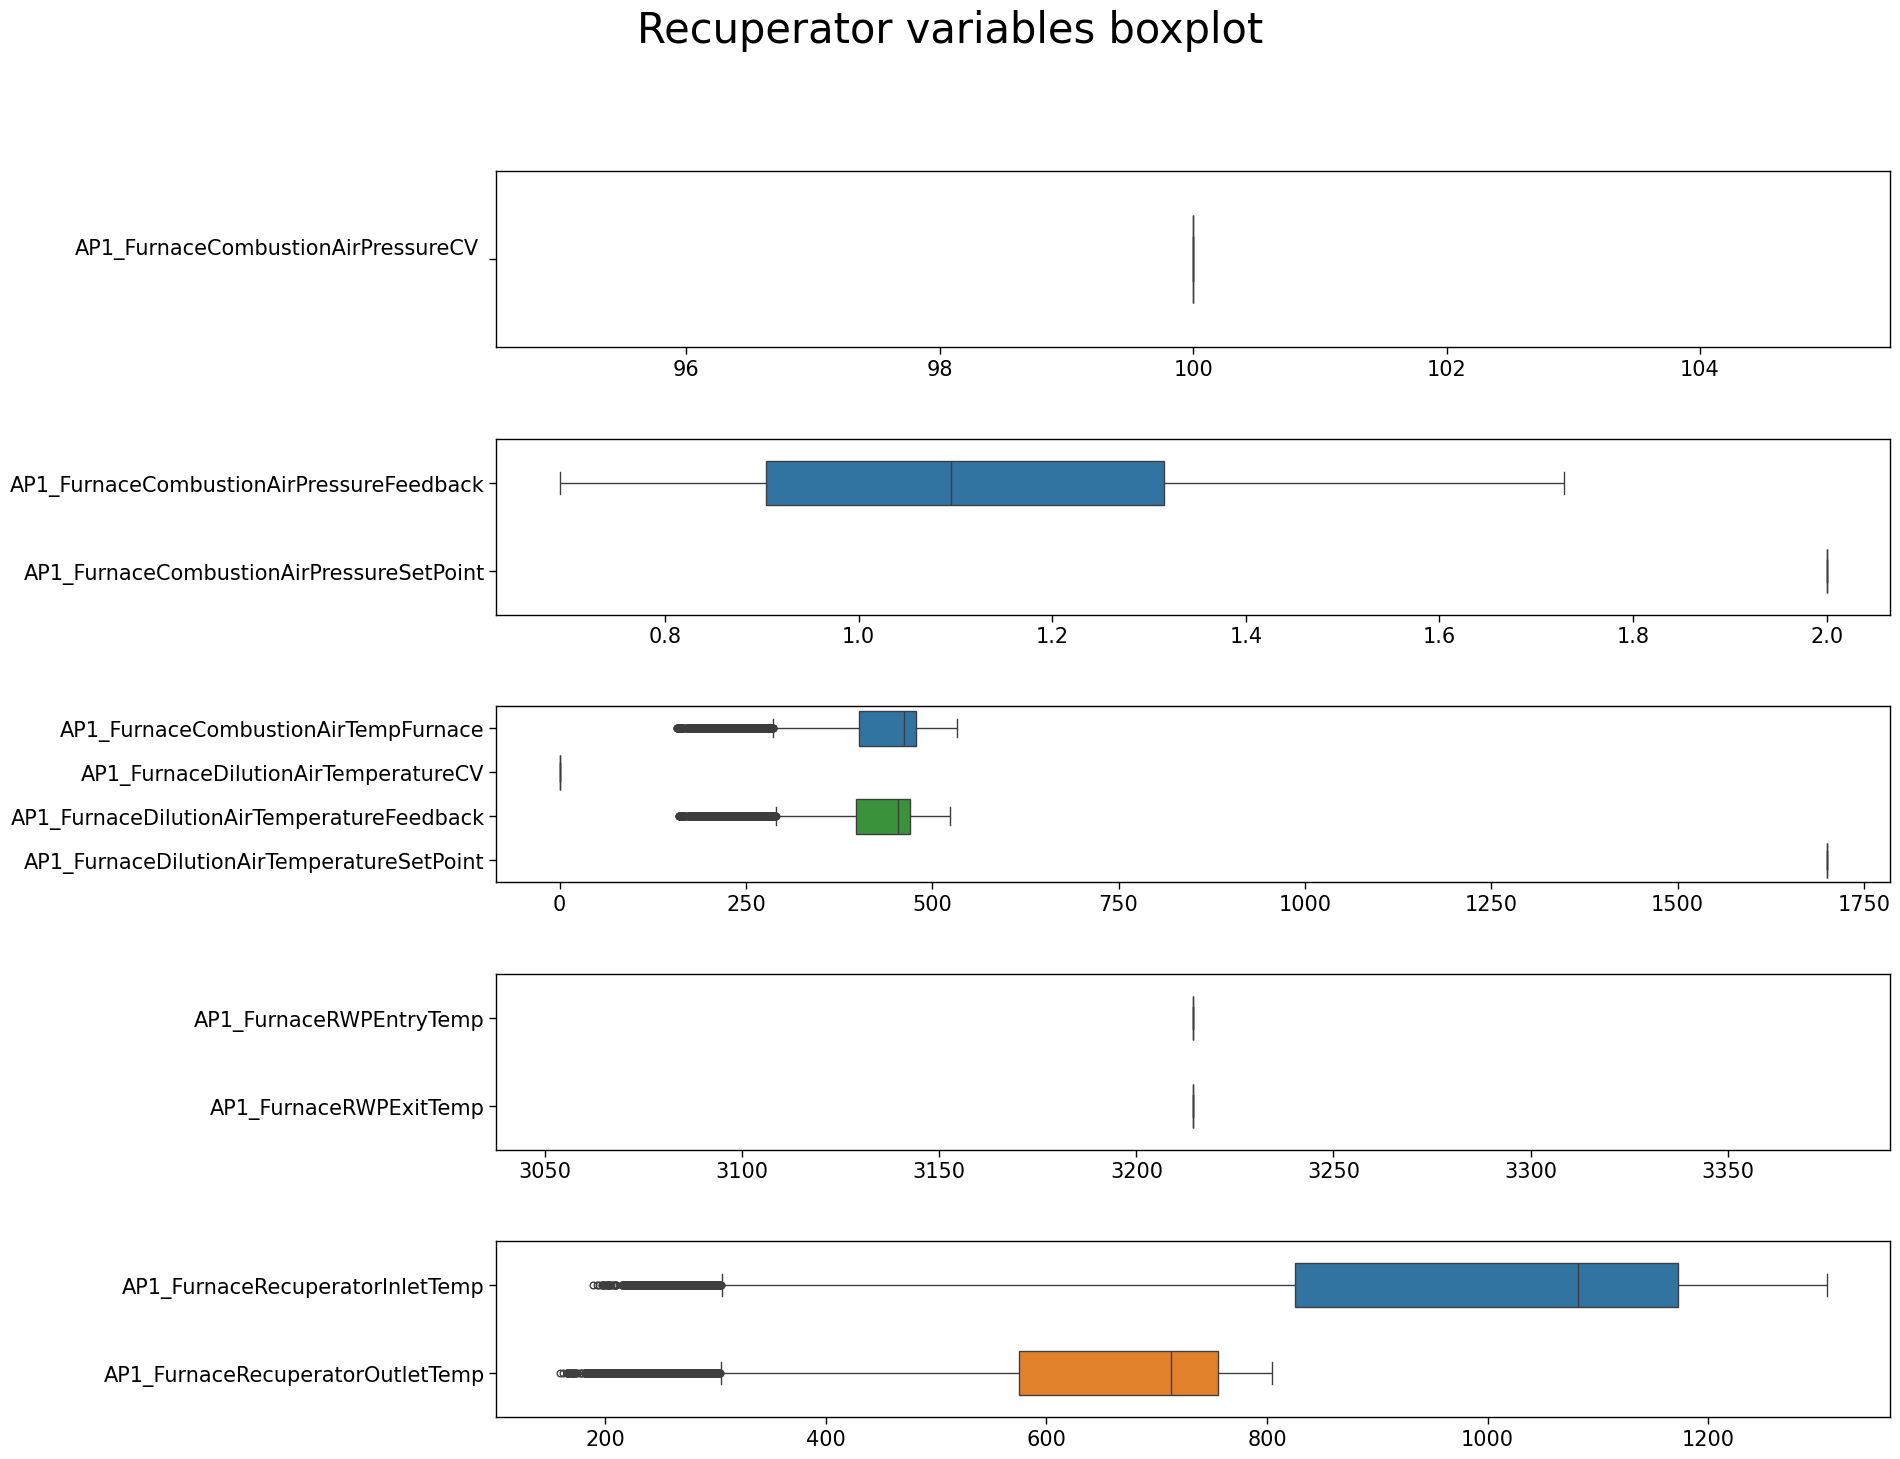

In [18]:
#Plot boxplot recuperator: 11 vars

fig,axes = plt.subplots(5,1,figsize=(20,15))
#sns.boxplot(data=dfXY[zoneTemp_vars_series[~zoneTemp_vars_series.str.contains("CV",regex=False)]],orient='h',ax=axes)
sns.boxplot(data=dfXY[recuperator_vars_series[0]],orient='h',ax=axes[0],width=0.5)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[0].set_ylabel(ylabel=recuperator_vars_series[0],rotation='horizontal',horizontalalignment='right',fontsize=15)
axes[0].set_xlabel(xlabel="")

sns.boxplot(data=dfXY[recuperator_vars_series[[1,2]]],orient='h',ax=axes[1],width=0.5)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

sns.boxplot(data=dfXY[recuperator_vars_series[[3,4,5,6]]],orient='h',ax=axes[2],width=0.8)
axes[2].tick_params(axis='x', labelsize=15)
axes[2].tick_params(axis='y', labelsize=15)

sns.boxplot(data=dfXY[recuperator_vars_series[[7,8]]],orient='h',ax=axes[3],width=0.5)
axes[3].tick_params(axis='x', labelsize=15)
axes[3].tick_params(axis='y', labelsize=15)

sns.boxplot(data=dfXY[recuperator_vars_series[[9,10]]],orient='h',ax=axes[4],width=0.5)
axes[4].tick_params(axis='x', labelsize=15)
axes[4].tick_params(axis='y', labelsize=15)

fig.suptitle("Recuperator variables boxplot",fontsize=30,y=1)
#axes.set_xlim(0,4)
#zone0_fg.map(sns.boxplot)
sns.set_context('paper',font_scale=1.5)
#sns.set(font_scale=1.5)
fig.tight_layout(pad=3)

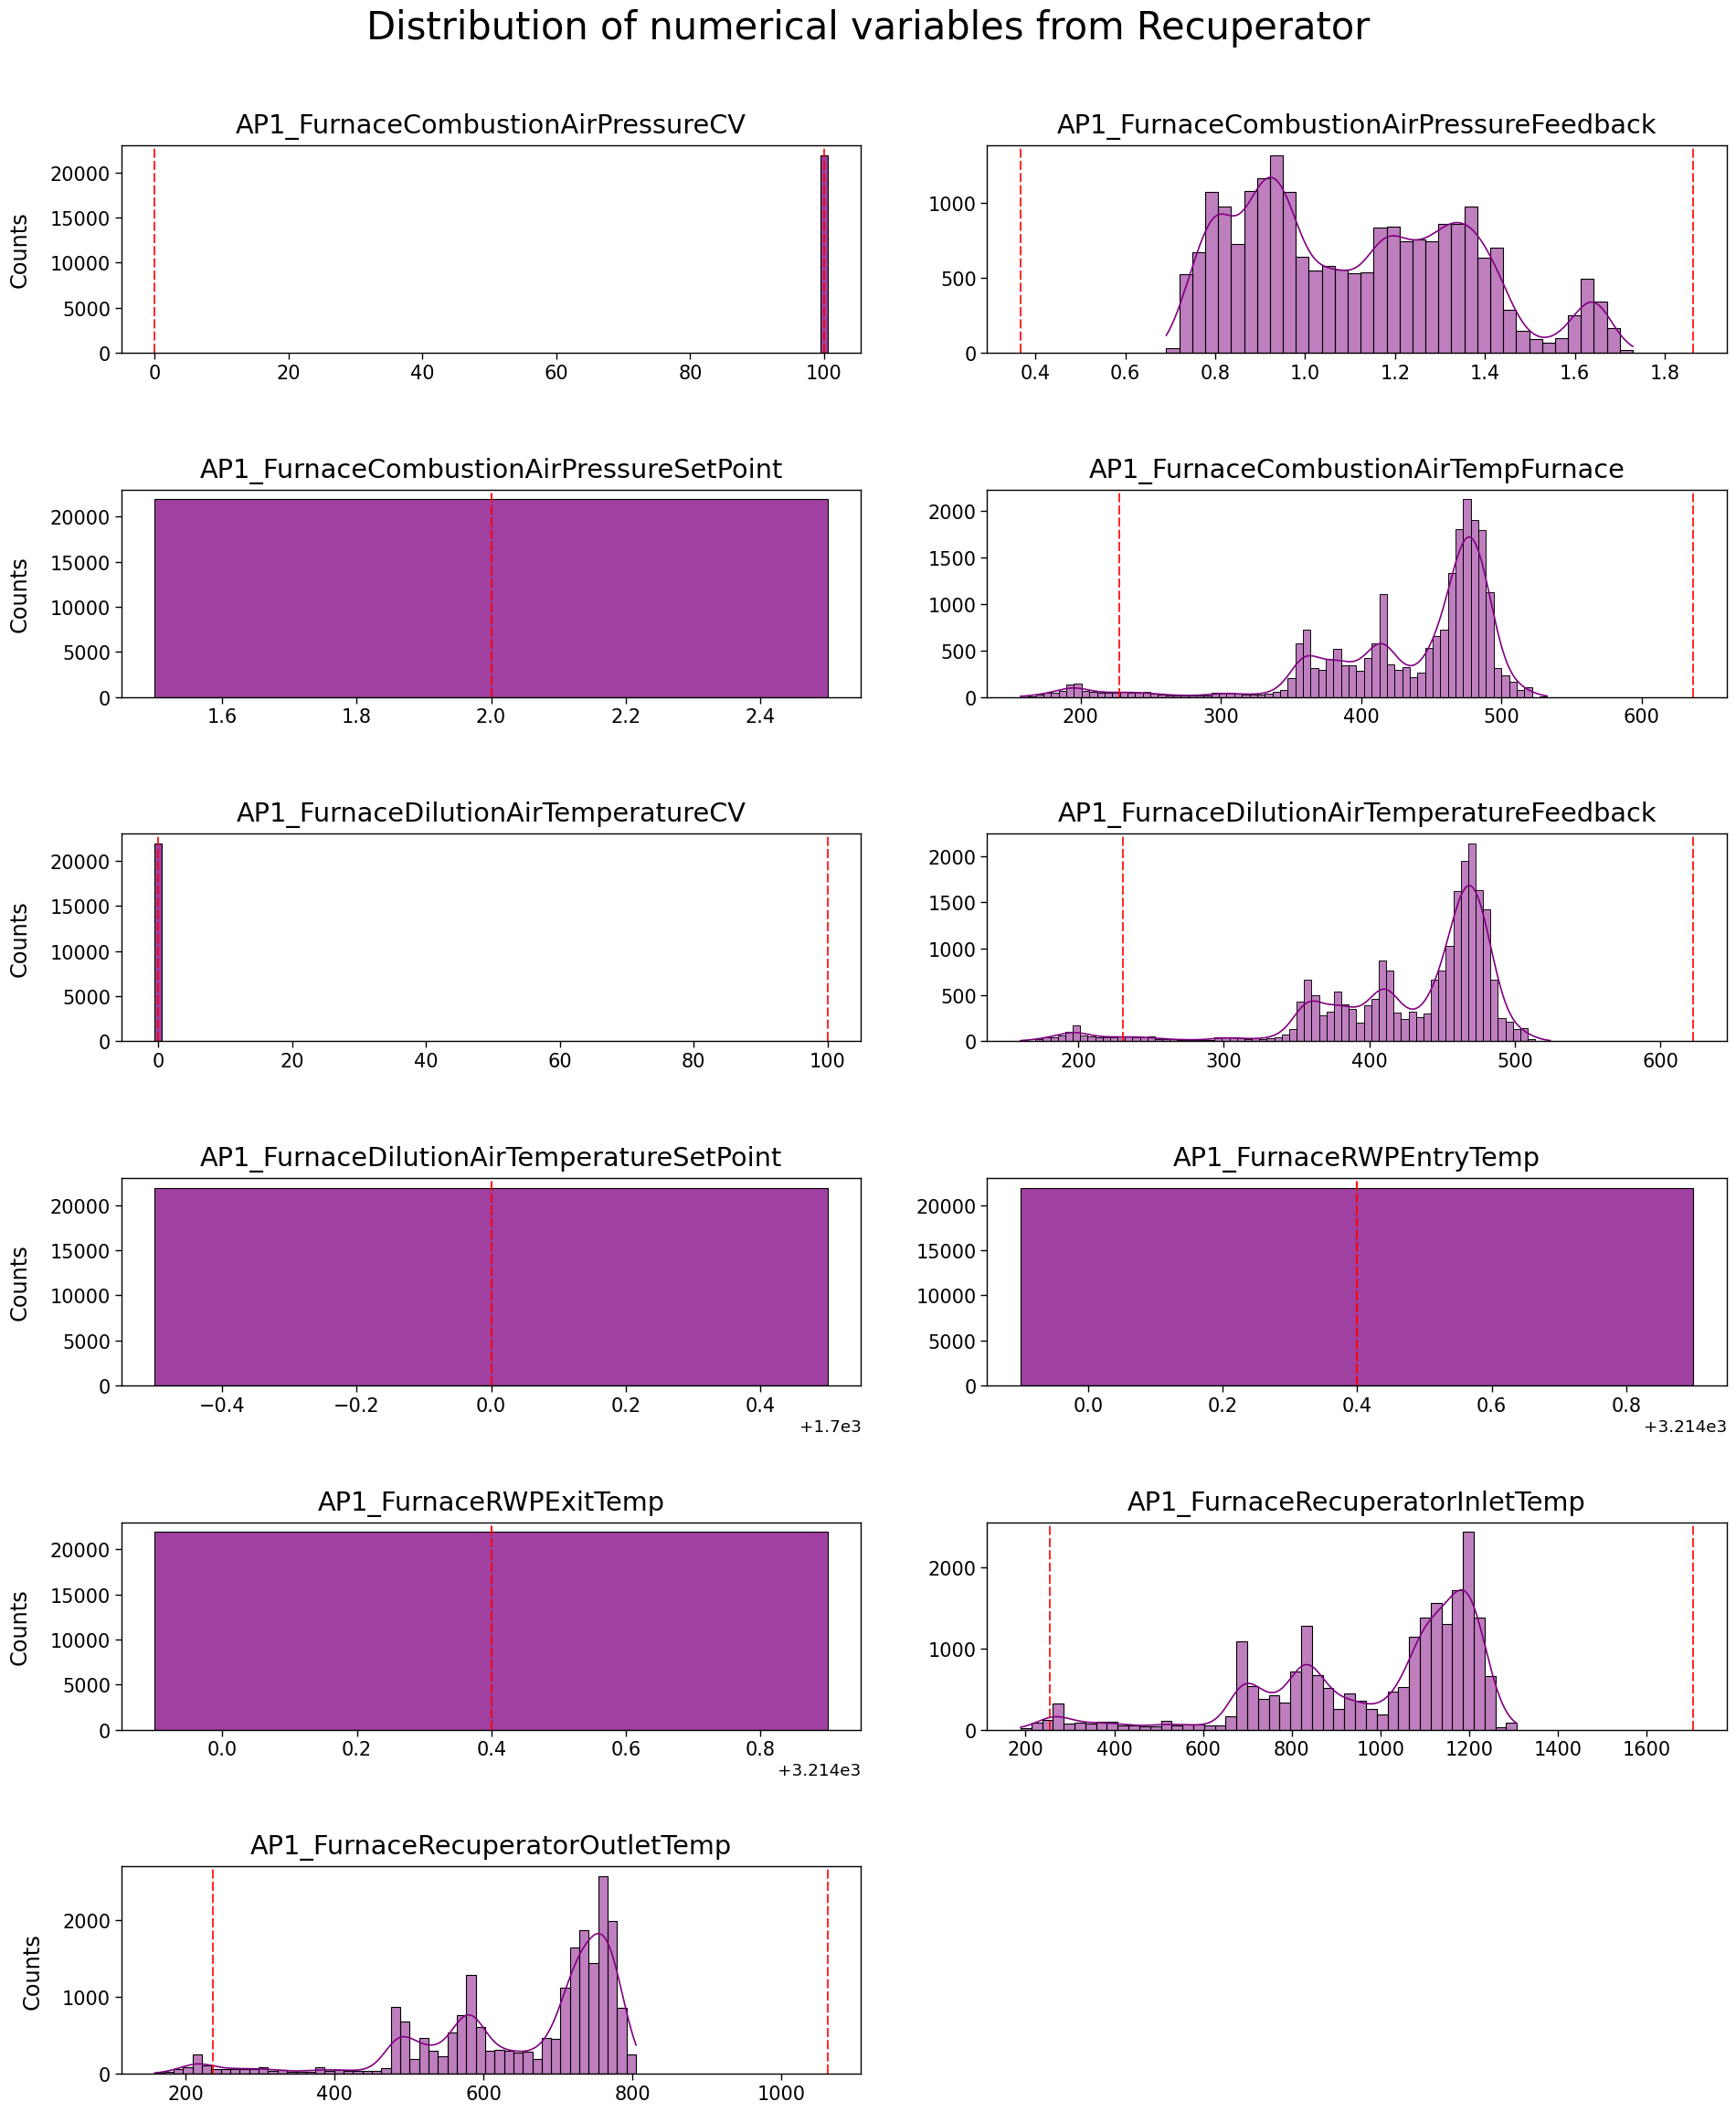

In [19]:
#Plot recuperator: 11 vars
func_hist_plot_rest(vars_series=recuperator_vars_series,title="Recuperator",ncol=2,colour="purple")
#NOTES: bimodal maybe bc steelgradefamily. pyro2goals are clustered by steelgradefam, so use pyro2goals to make famID and use it as hue with thermocouples

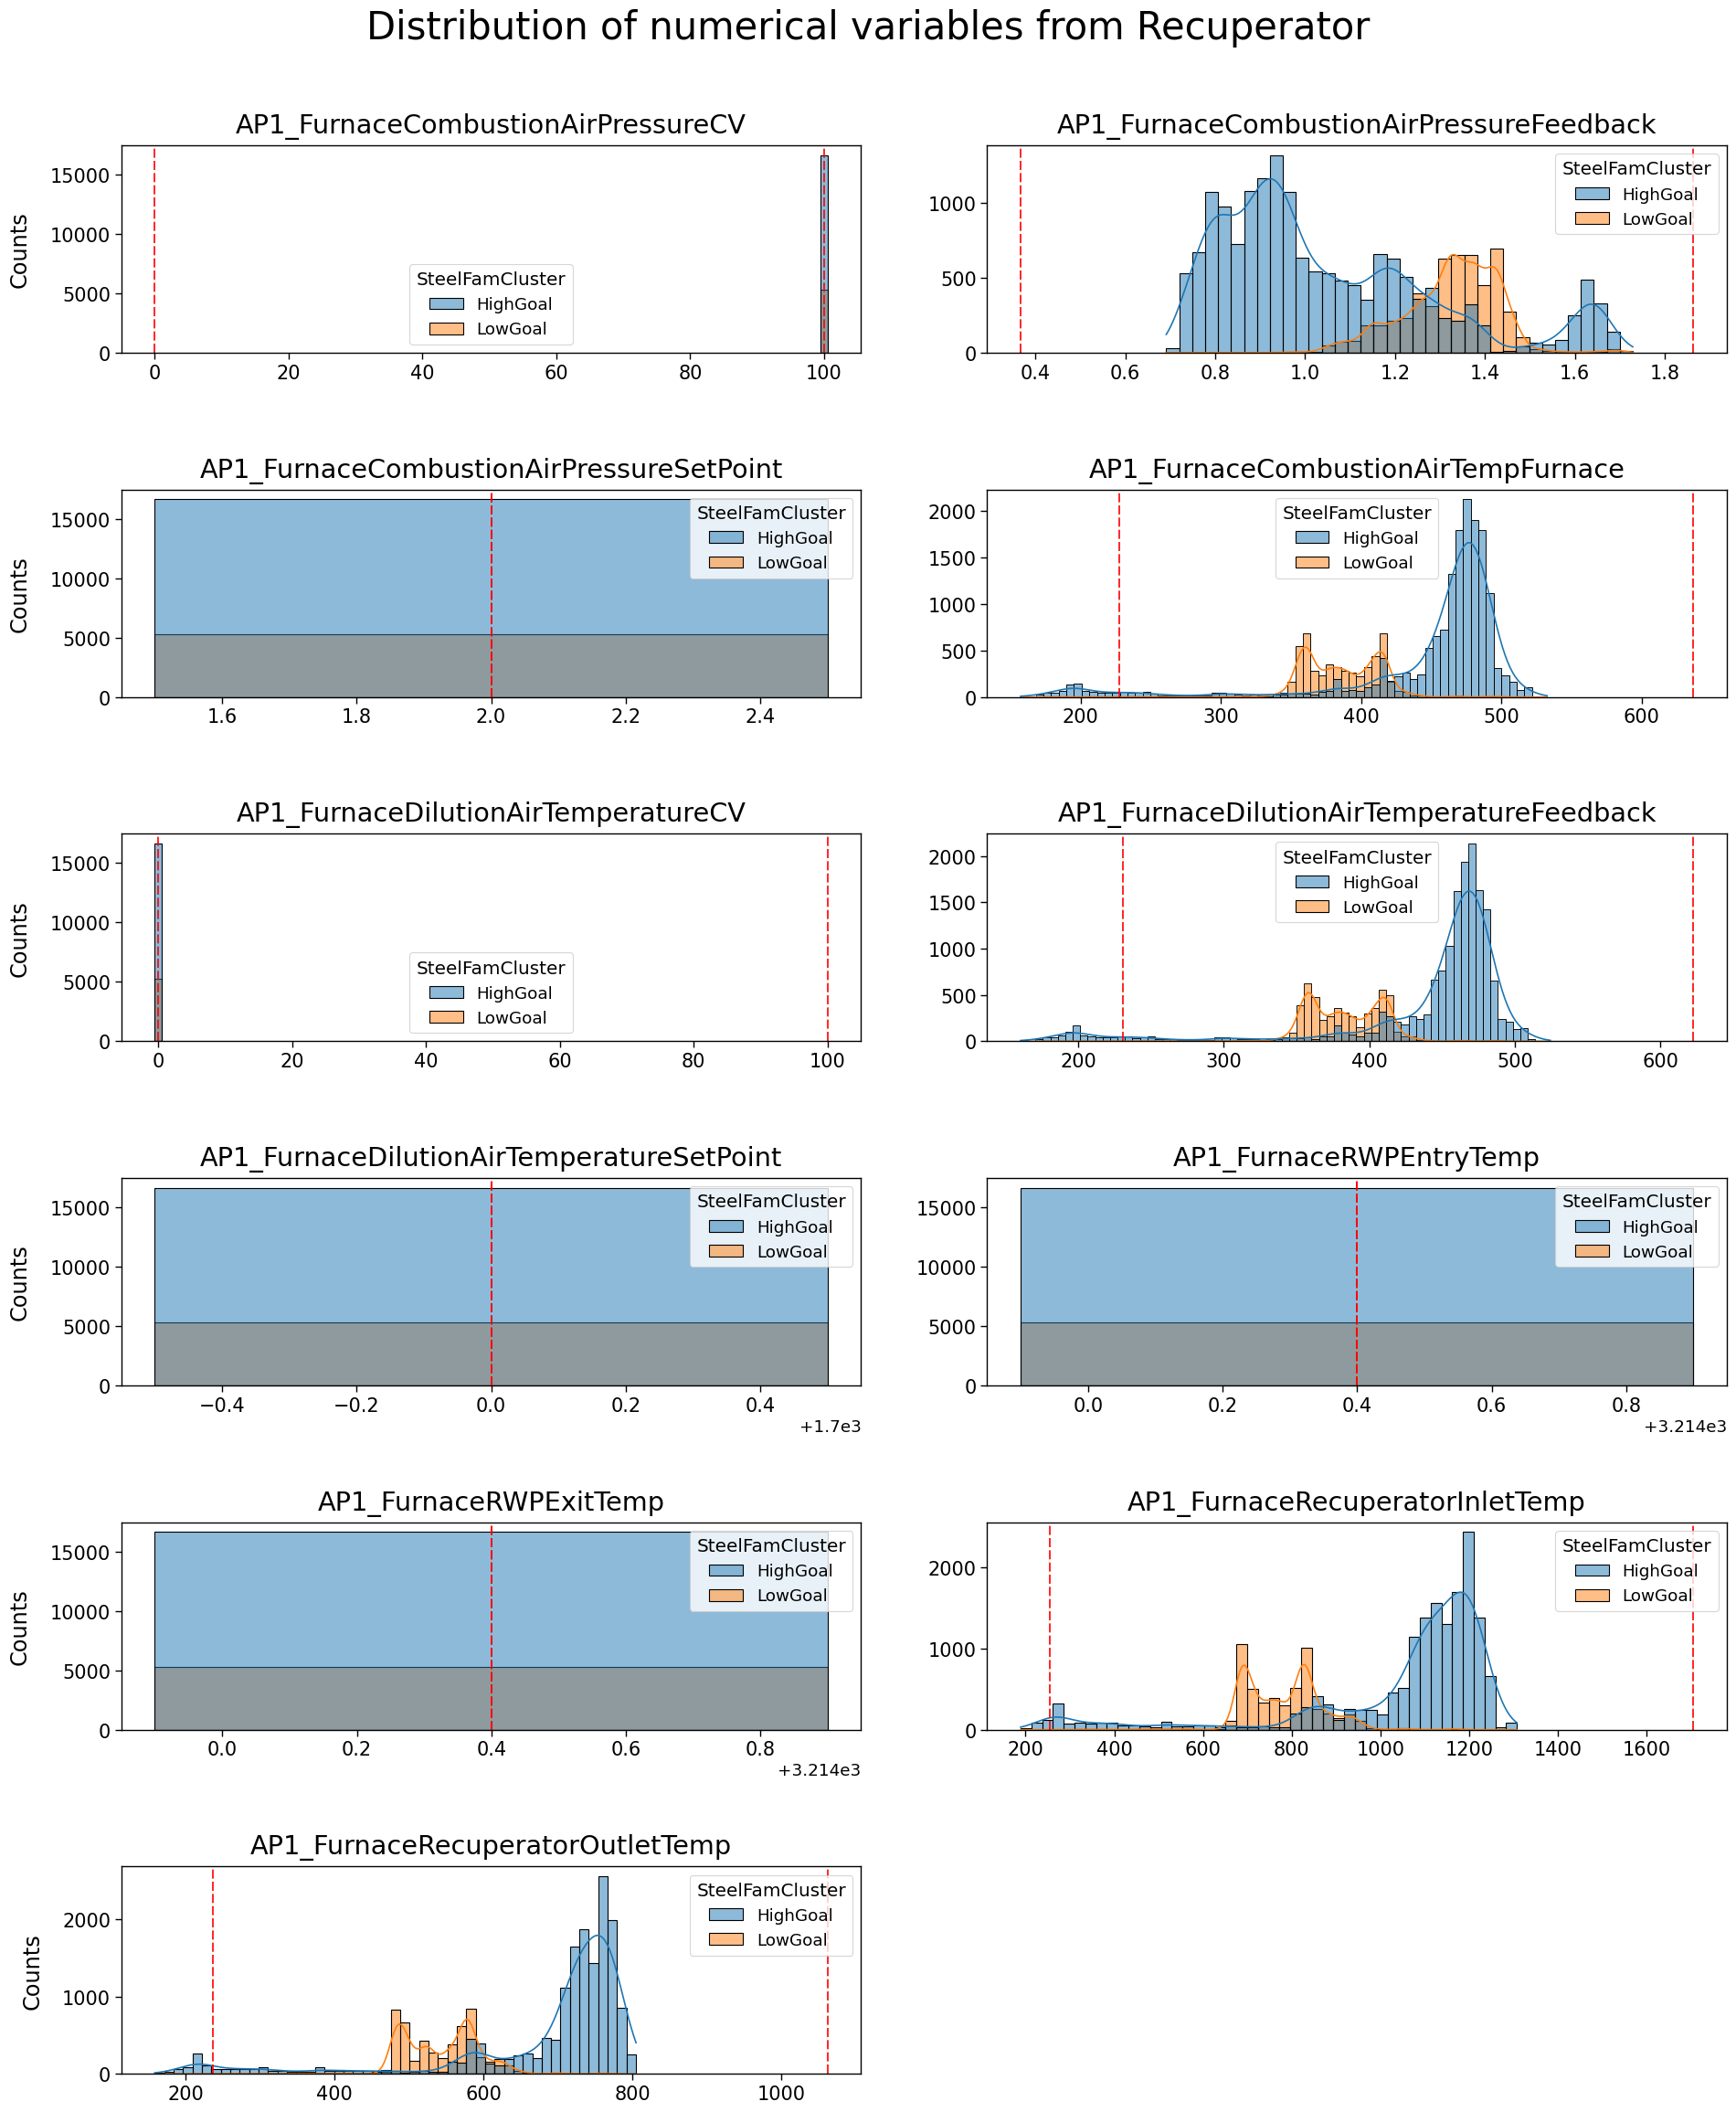

In [20]:
#Plot recuperator: 11 vars
func_hist_plot_rest(vars_series=recuperator_vars_series,title="Recuperator",ncol=2,hue="SteelFamCluster")
#NOTES: bimodal maybe bc steelgradefamily. pyro2goals are clustered by steelgradefam, so use pyro2goals to make famID and use it as hue with thermocouples

In [21]:
dfXY[recuperator_vars_series].head()#.value_counts()
np.round(dfXY.AP1_FurnaceCombustionAirPressureCV.value_counts().index.values,1)
dfXY[["AP1_FurnaceCombustionAirPressureCV","AP1_FurnaceRWPExitTemp","AP1_FurnaceRWPEntryTemp","AP1_FurnaceCombustionAirPressureSetPoint","AP1_FurnaceDilutionAirTemperatureCV","AP1_FurnaceDilutionAirTemperatureSetPoint"]].apply(pd.Series.value_counts,axis=0)

#We see that those vars have cte and unique values


AP1_FurnaceCombustionAirPressureCV  AP1_FurnaceRWPExitTemp  \
0.000000                                    NaN                     NaN   
2.000000                                    NaN                     NaN   
100.000000                              21907.0                     NaN   
1700.000000                                 NaN                     NaN   
3214.399658                                 NaN                 21907.0   

             AP1_FurnaceRWPEntryTemp  \
0.000000                         NaN   
2.000000                         NaN   
100.000000                       NaN   
1700.000000                      NaN   
3214.399658                  21907.0   

             AP1_FurnaceCombustionAirPressureSetPoint  \
0.000000                                          NaN   
2.000000                                      21907.0   
100.000000                                        NaN   
1700.000000                                       NaN   
3214.399658                                       NaN   

             AP1_FurnaceDilutionAirTemperatureCV  \
0.000000                                 21907.0   
2.000000                                     NaN   
100.000000                                   NaN   
1700.000000                                  NaN   
3214.399658                                  NaN   

             AP1_FurnaceDilutionAirTemperatureSetPoint  
0.000000                                           NaN  
2.000000                                           NaN  
100.000000                                         NaN  
1700.000000                                    21907.0  
3214.399658                                        NaN

### C.1.4 Plot pyro: 3 vars

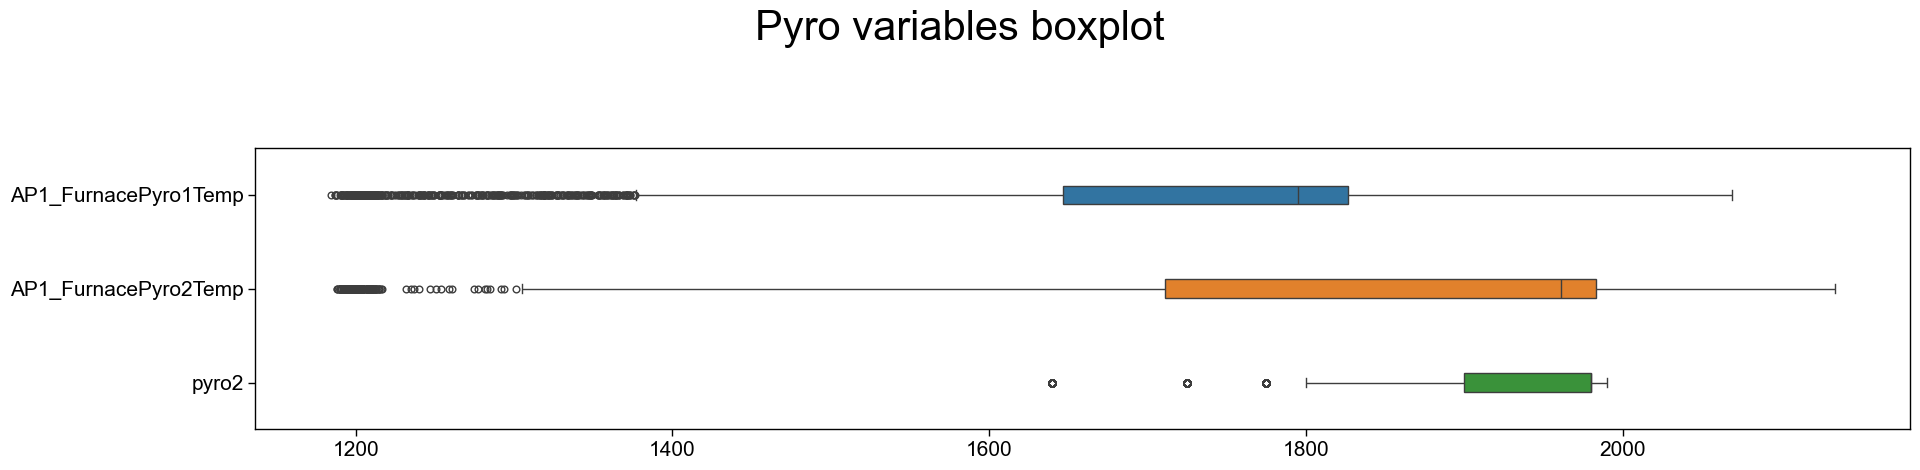

In [22]:
#Plot boxplot pyro: 3 vars

fig,axes = plt.subplots(figsize=(20,5))
#sns.boxplot(data=dfXY[zoneTemp_vars_series[~zoneTemp_vars_series.str.contains("CV",regex=False)]],orient='h',ax=axes)
sns.boxplot(data=dfXY[pyro_vars_series],orient='h',ax=axes,width=0.2)
axes.tick_params(axis='x', labelsize=15)
axes.tick_params(axis='y', labelsize=15)
fig.suptitle("Pyro variables boxplot",fontsize=30,y=1)
#axes.set_xlim(0,4)
#zone0_fg.map(sns.boxplot)
sns.set_context('paper')
sns.set(font_scale=1)
fig.tight_layout(pad=3)

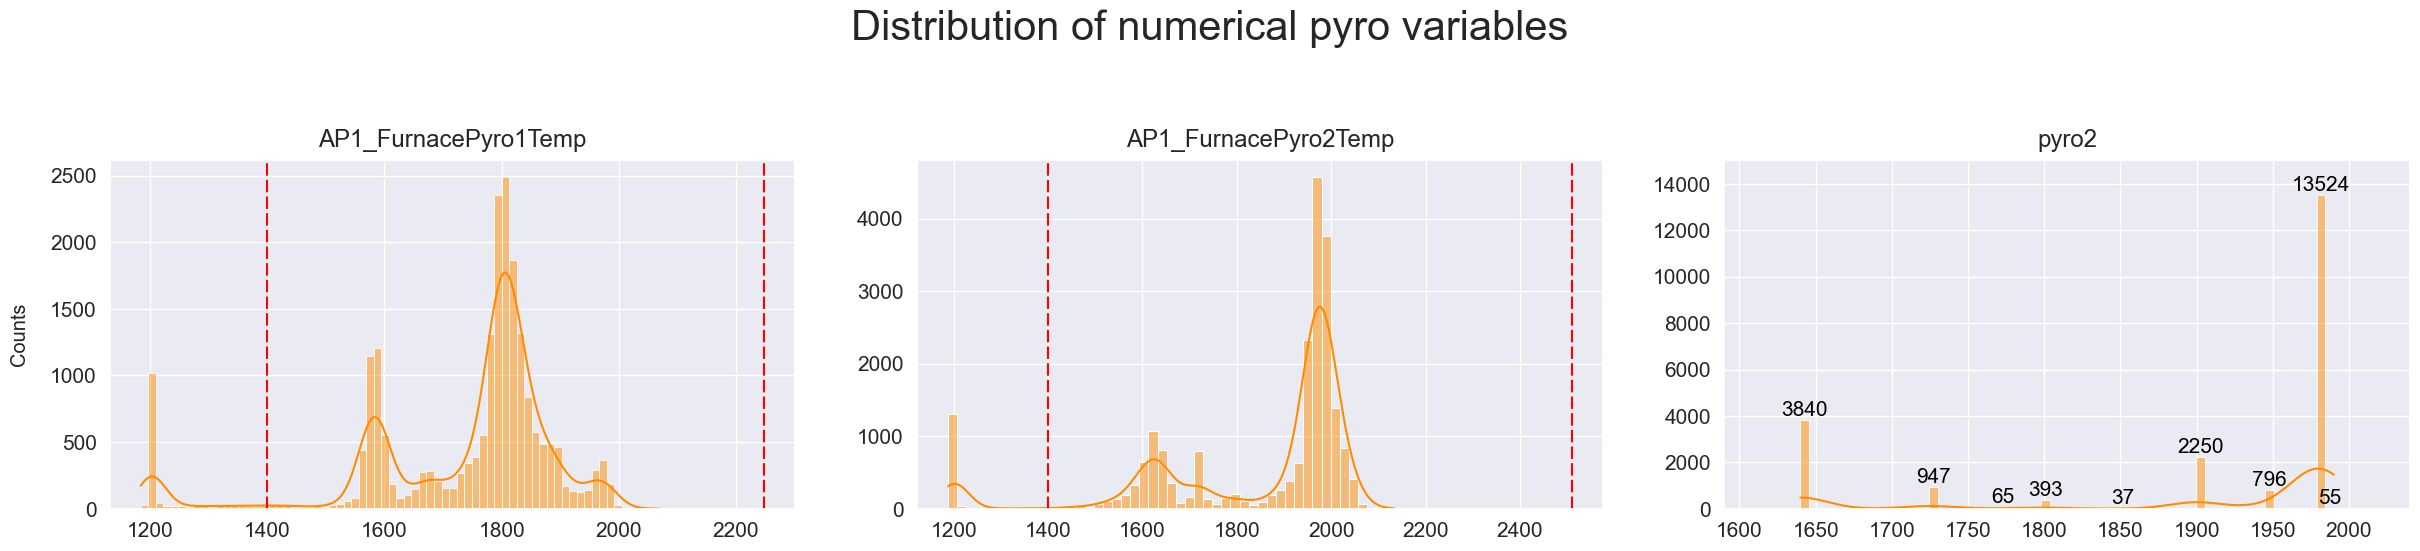

In [23]:
#Plot pyro: 3 vars
ncol=3
nrow=dfXY[pyro_vars_series].shape[1]//ncol+1
var=0

fig,axes = plt.subplots(nrow,ncol,figsize=(25,nrow*20/4))
fig.suptitle("Distribution of numerical pyro variables",fontsize=30)

for r in range(nrow):
    for c in range(ncol):
        if var<len(pyro_vars_series.to_list()):
            hist_container=sns.histplot(data=dfXY,x=pyro_vars_series[var],ax=axes[r,c],kde=True,color="darkorange")
            axes[r,c].set_title(label=pyro_vars_series[var],loc='center',pad=10,fontsize="x-large")
            axes[r,c].set_xlabel(xlabel="",labelpad=10)
            axes[r,c].set_ylabel(ylabel="",labelpad=15)
            axes[r,c].axvline(tbl_desc.loc['cut-',pyro_vars_series[var]], color="red", dashes=(6, 2)) #Cut-
            axes[r,c].axvline(tbl_desc.loc['cut+',pyro_vars_series[var]], color="red", dashes=(6, 2)) #Cut+
            axes[r,c].tick_params(axis='x', labelsize=15)
            axes[r,c].tick_params(axis='y', labelsize=15)

            if pyro_vars_series[var]=="pyro2":
                #Better show graph
                axes[r,c].set_xlim(dfXY.pyro2.min()-50,dfXY.pyro2.max()+50)
                #sns.barplot method will return a list of sub methods, use containers method to access the text label of each bar by passing it through the ax.bar_label function use for loop to iterate through the list of labels and assign each bar to a different label.
                #If using seaborn hist instead of plot.hist, it will add labels to the bins with 0 counts
                #axes[r,c].bar_label(container=hist_container.containers[0])
                barRectangles = axes[r,c].patches
                labels = dfXY.pyro2.value_counts().sort_index().values
                label_i=0
                #Cannot loop through zip(barRectangles,labels) bc barRect is larger as there are rect in the bins with 0 counts
                for rect in barRectangles:#zip()stop when the shortest list ends, iterate through rect bars
                    height = rect.get_height()
                    if height != 0:
                        #print(rect.get_x(),height+6,label)
                        axes[r,c].text(x=rect.get_x()+rect.get_width()/2,y=height+6,s=str(int(height)),ha="center",va="bottom",color="black",fontsize=15)#s=str(labels[label_i])
                        label_i+=1

                #Make room for all labels in plot
                axes[r,c].set_ylim(top=max(labels)+1500)
                #Other way, but not centered horizontally as u dont have the width of the bars
                #for index, value in dfXY.pyro2.value_counts().sort_index().items():
                #    axes[r,c].text(x=index, y=value, s=value, color='yellow', ha='center')

            if c==0:
                axes[r,c].set_ylabel(ylabel="Counts",labelpad=15,fontsize="large")

            var+=1
        #remove unused axes
        #print(len(axes[r,c].get_children()))
        if len(axes[r,c].get_children()) <=10:#empty plots have 10 children
            axes[r,c].set_visible(False)


# for ax in axes.flatten(): #axes.flatten() is a np.array of matplotlib.axes._axes.Axes
#     if not ax.lines: #ax.lines is a matplotlib.axes._base._AxesBase.ArtistList,tells u number of lines in the subplot, if 0 then is empty
#         ax.set_visible(False)

#Keep outer labels
# for ax in fig.get_axes():
#     ax.label_outer()

#Make space between subplots
fig.tight_layout(pad=3)

In [24]:
dfXY.pyro2.value_counts().sort_index().index#.iloc[:1].values[0]#.index[0]
dfXY.pyro2.value_counts().sort_index().values

array([ 3840,   947,    65,   393,    37,  2250,   796, 13524,    55])

In [25]:
#7 different goals:I think in 3 clusters
dfXY.pyro2.value_counts().sort_values()

pyro2
1850.0       37
1990.0       55
1775.0       65
1800.0      393
1950.0      796
1725.0      947
1900.0     2250
1640.0     3840
1980.0    13524
Name: count, dtype: int64

### C.1.5 Plot rest vars: 11 vars

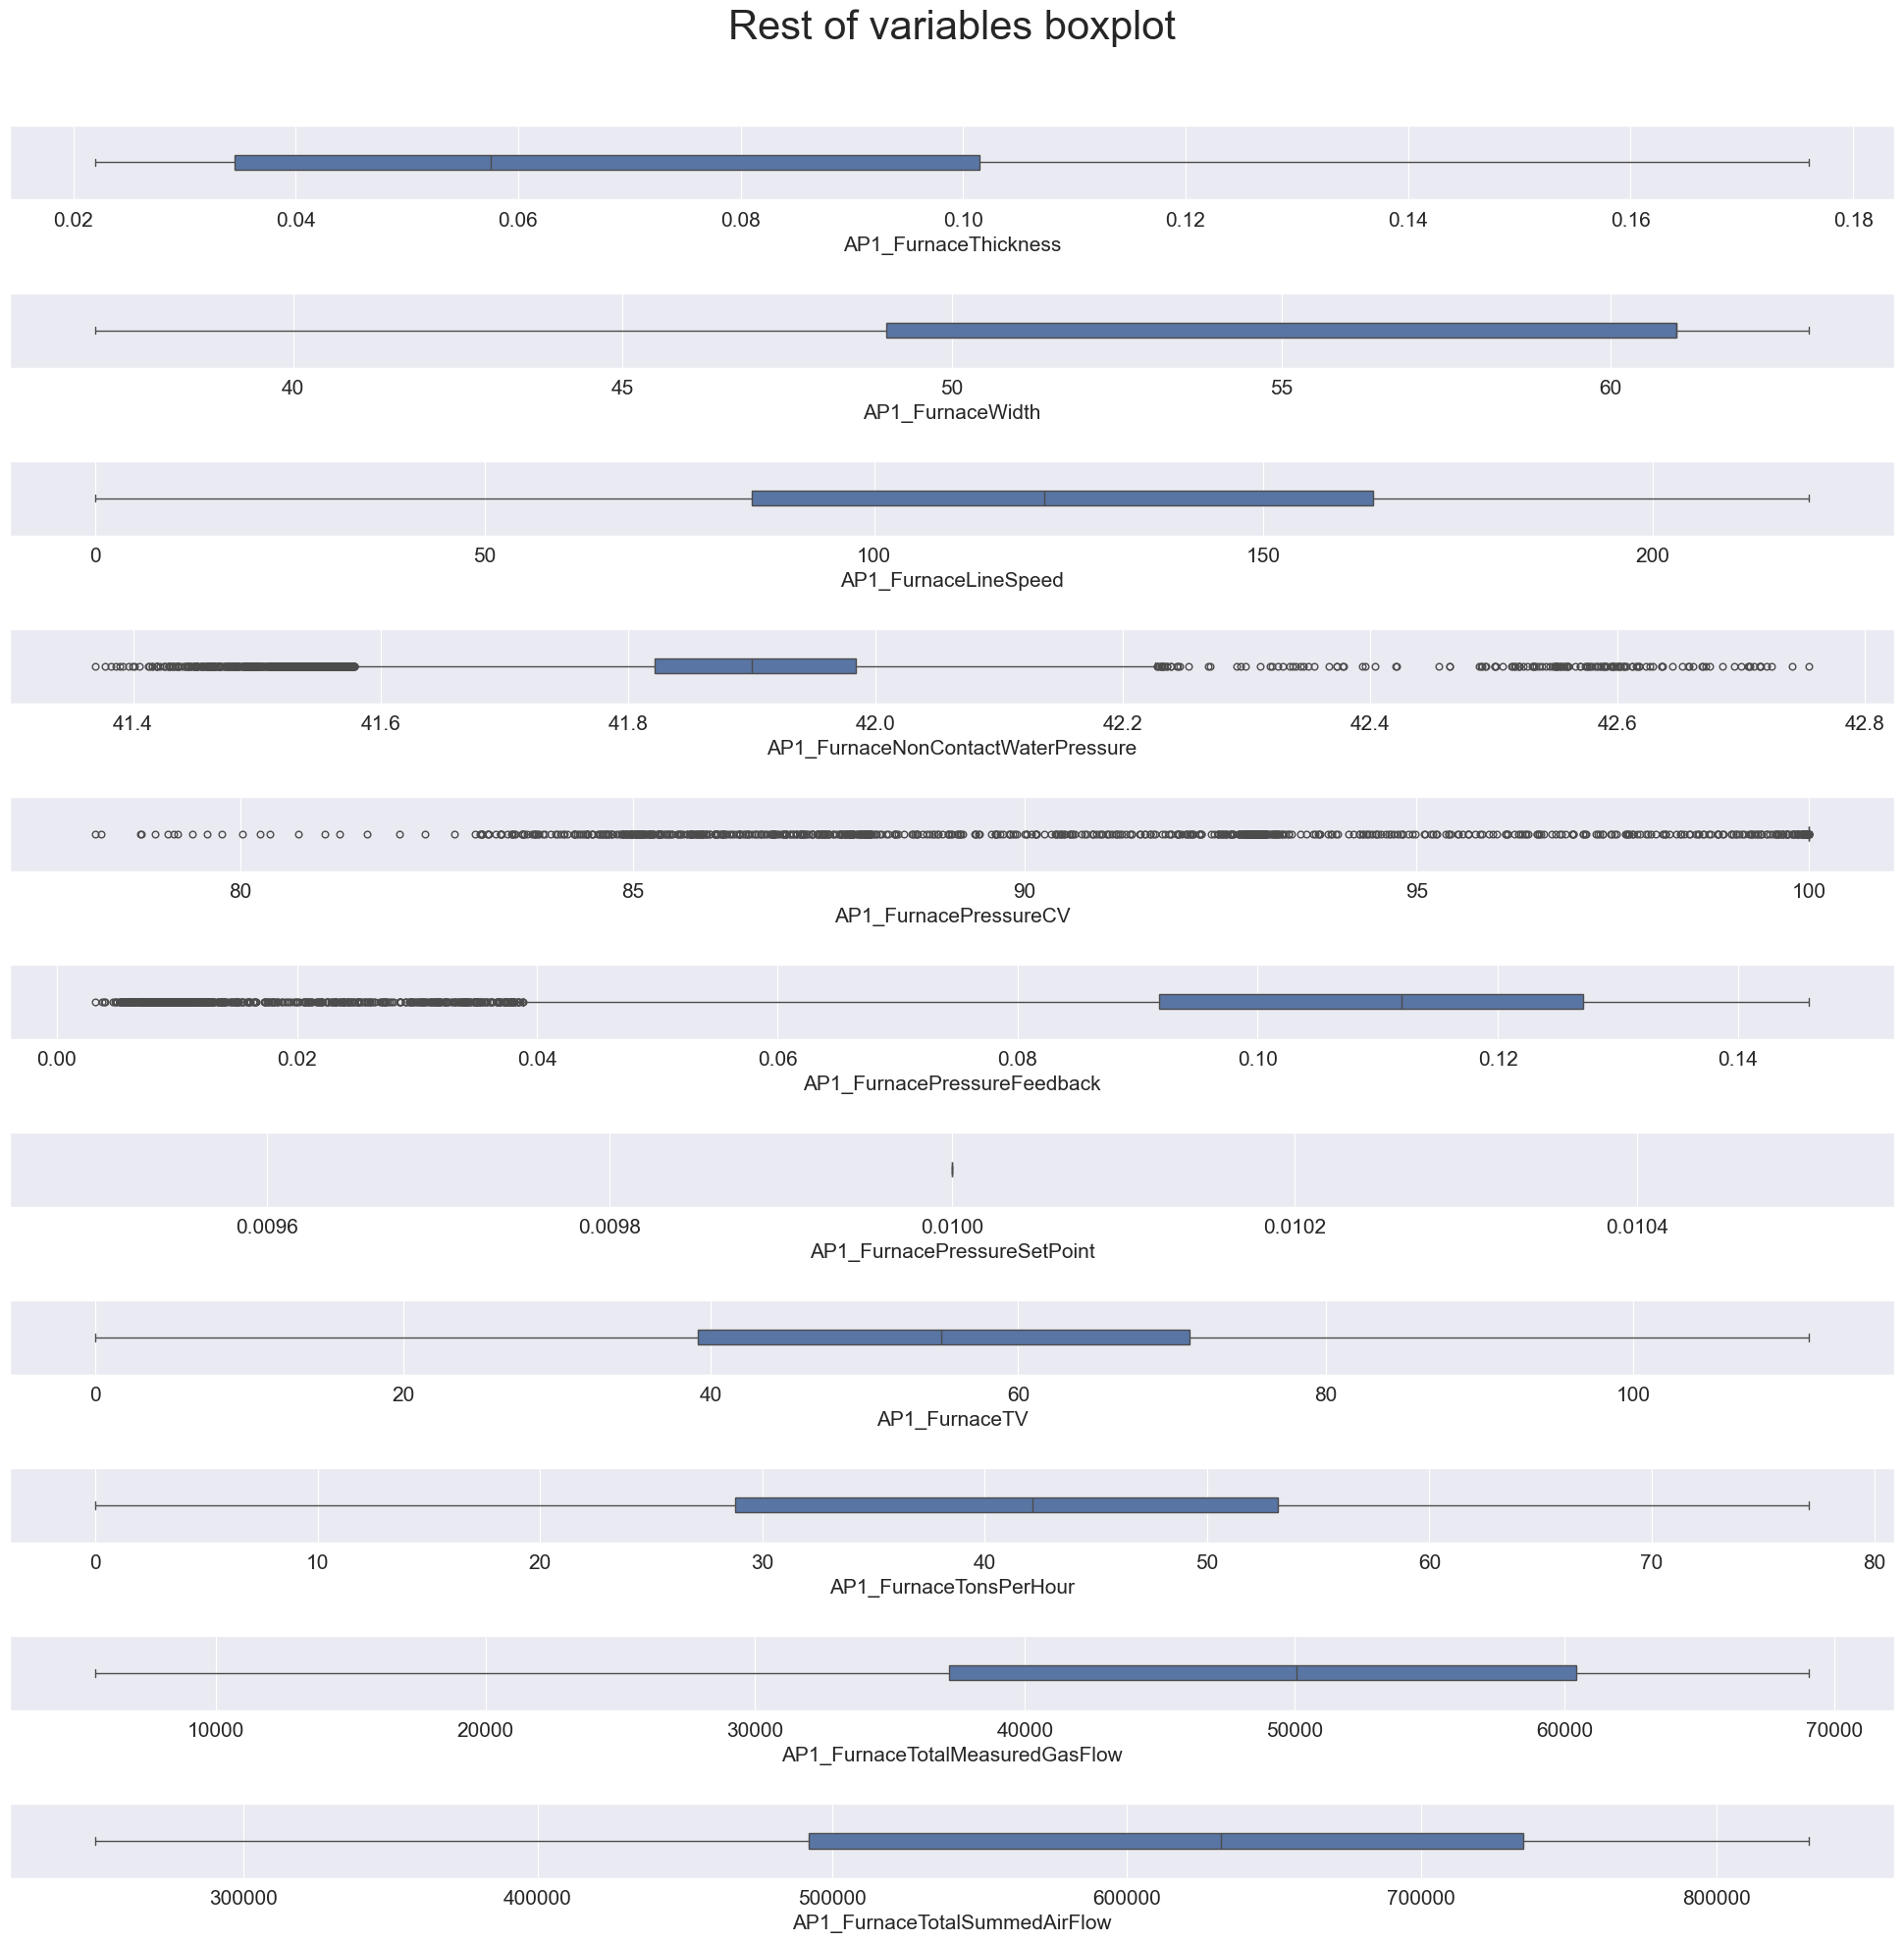

In [29]:
#Plot boxplot rest vars: 11 vars

fig,axes = plt.subplots(11,1,figsize=(20,20))
#sns.boxplot(data=dfXY[zoneTemp_vars_series[~zoneTemp_vars_series.str.contains("CV",regex=False)]],orient='h',ax=axes)
#axes[0].yaxis.set_major_locator(ticker.NullLocator())
sns.boxplot(data=dfXY[rest_vars_series[0]],orient='h',ax=axes[0],width=0.2)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].set_xlabel(rest_vars_series[0], fontsize=15)

sns.boxplot(data=dfXY[rest_vars_series[1]],orient='h',ax=axes[1],width=0.2)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].set_xlabel(rest_vars_series[1], fontsize=15)

sns.boxplot(data=dfXY[rest_vars_series[2]],orient='h',ax=axes[2],width=0.2)
axes[2].tick_params(axis='x', labelsize=15)
axes[2].set_xlabel(rest_vars_series[2], fontsize=15)

sns.boxplot(data=dfXY[rest_vars_series[3]],orient='h',ax=axes[3],width=0.2)
axes[3].tick_params(axis='x', labelsize=15)
axes[3].set_xlabel(rest_vars_series[3], fontsize=15)

sns.boxplot(data=dfXY[rest_vars_series[4]],orient='h',ax=axes[4],width=0.2)
axes[4].tick_params(axis='x', labelsize=15)
axes[4].set_xlabel(rest_vars_series[4], fontsize=15)

sns.boxplot(data=dfXY[rest_vars_series[5]],orient='h',ax=axes[5],width=0.2)
axes[5].tick_params(axis='x', labelsize=15)
axes[5].set_xlabel(rest_vars_series[5], fontsize=15)

sns.boxplot(data=dfXY[rest_vars_series[6]],orient='h',ax=axes[6],width=0.2)
axes[6].tick_params(axis='x', labelsize=15)
axes[6].set_xlabel(rest_vars_series[6], fontsize=15)

sns.boxplot(data=dfXY[rest_vars_series[7]],orient='h',ax=axes[7],width=0.2)
axes[7].tick_params(axis='x', labelsize=15)
axes[7].set_xlabel(rest_vars_series[7], fontsize=15)

sns.boxplot(data=dfXY[rest_vars_series[8]],orient='h',ax=axes[8],width=0.2)
axes[8].tick_params(axis='x', labelsize=15)
axes[8].set_xlabel(rest_vars_series[8], fontsize=15)

sns.boxplot(data=dfXY[rest_vars_series[9]],orient='h',ax=axes[9],width=0.2)
axes[9].tick_params(axis='x', labelsize=15)
axes[9].set_xlabel(rest_vars_series[9], fontsize=15)

sns.boxplot(data=dfXY[rest_vars_series[10]],orient='h',ax=axes[10],width=0.2)
axes[10].tick_params(axis='x', labelsize=15)
axes[10].set_xlabel(rest_vars_series[10], fontsize=15)

fig.suptitle("Rest of variables boxplot",fontsize=30,y=1)
#axes.set_xlim(0,4)
#zone0_fg.map(sns.boxplot)
sns.set_context('paper')
#sns.set(font_scale=1.3)
fig.tight_layout(pad=3)

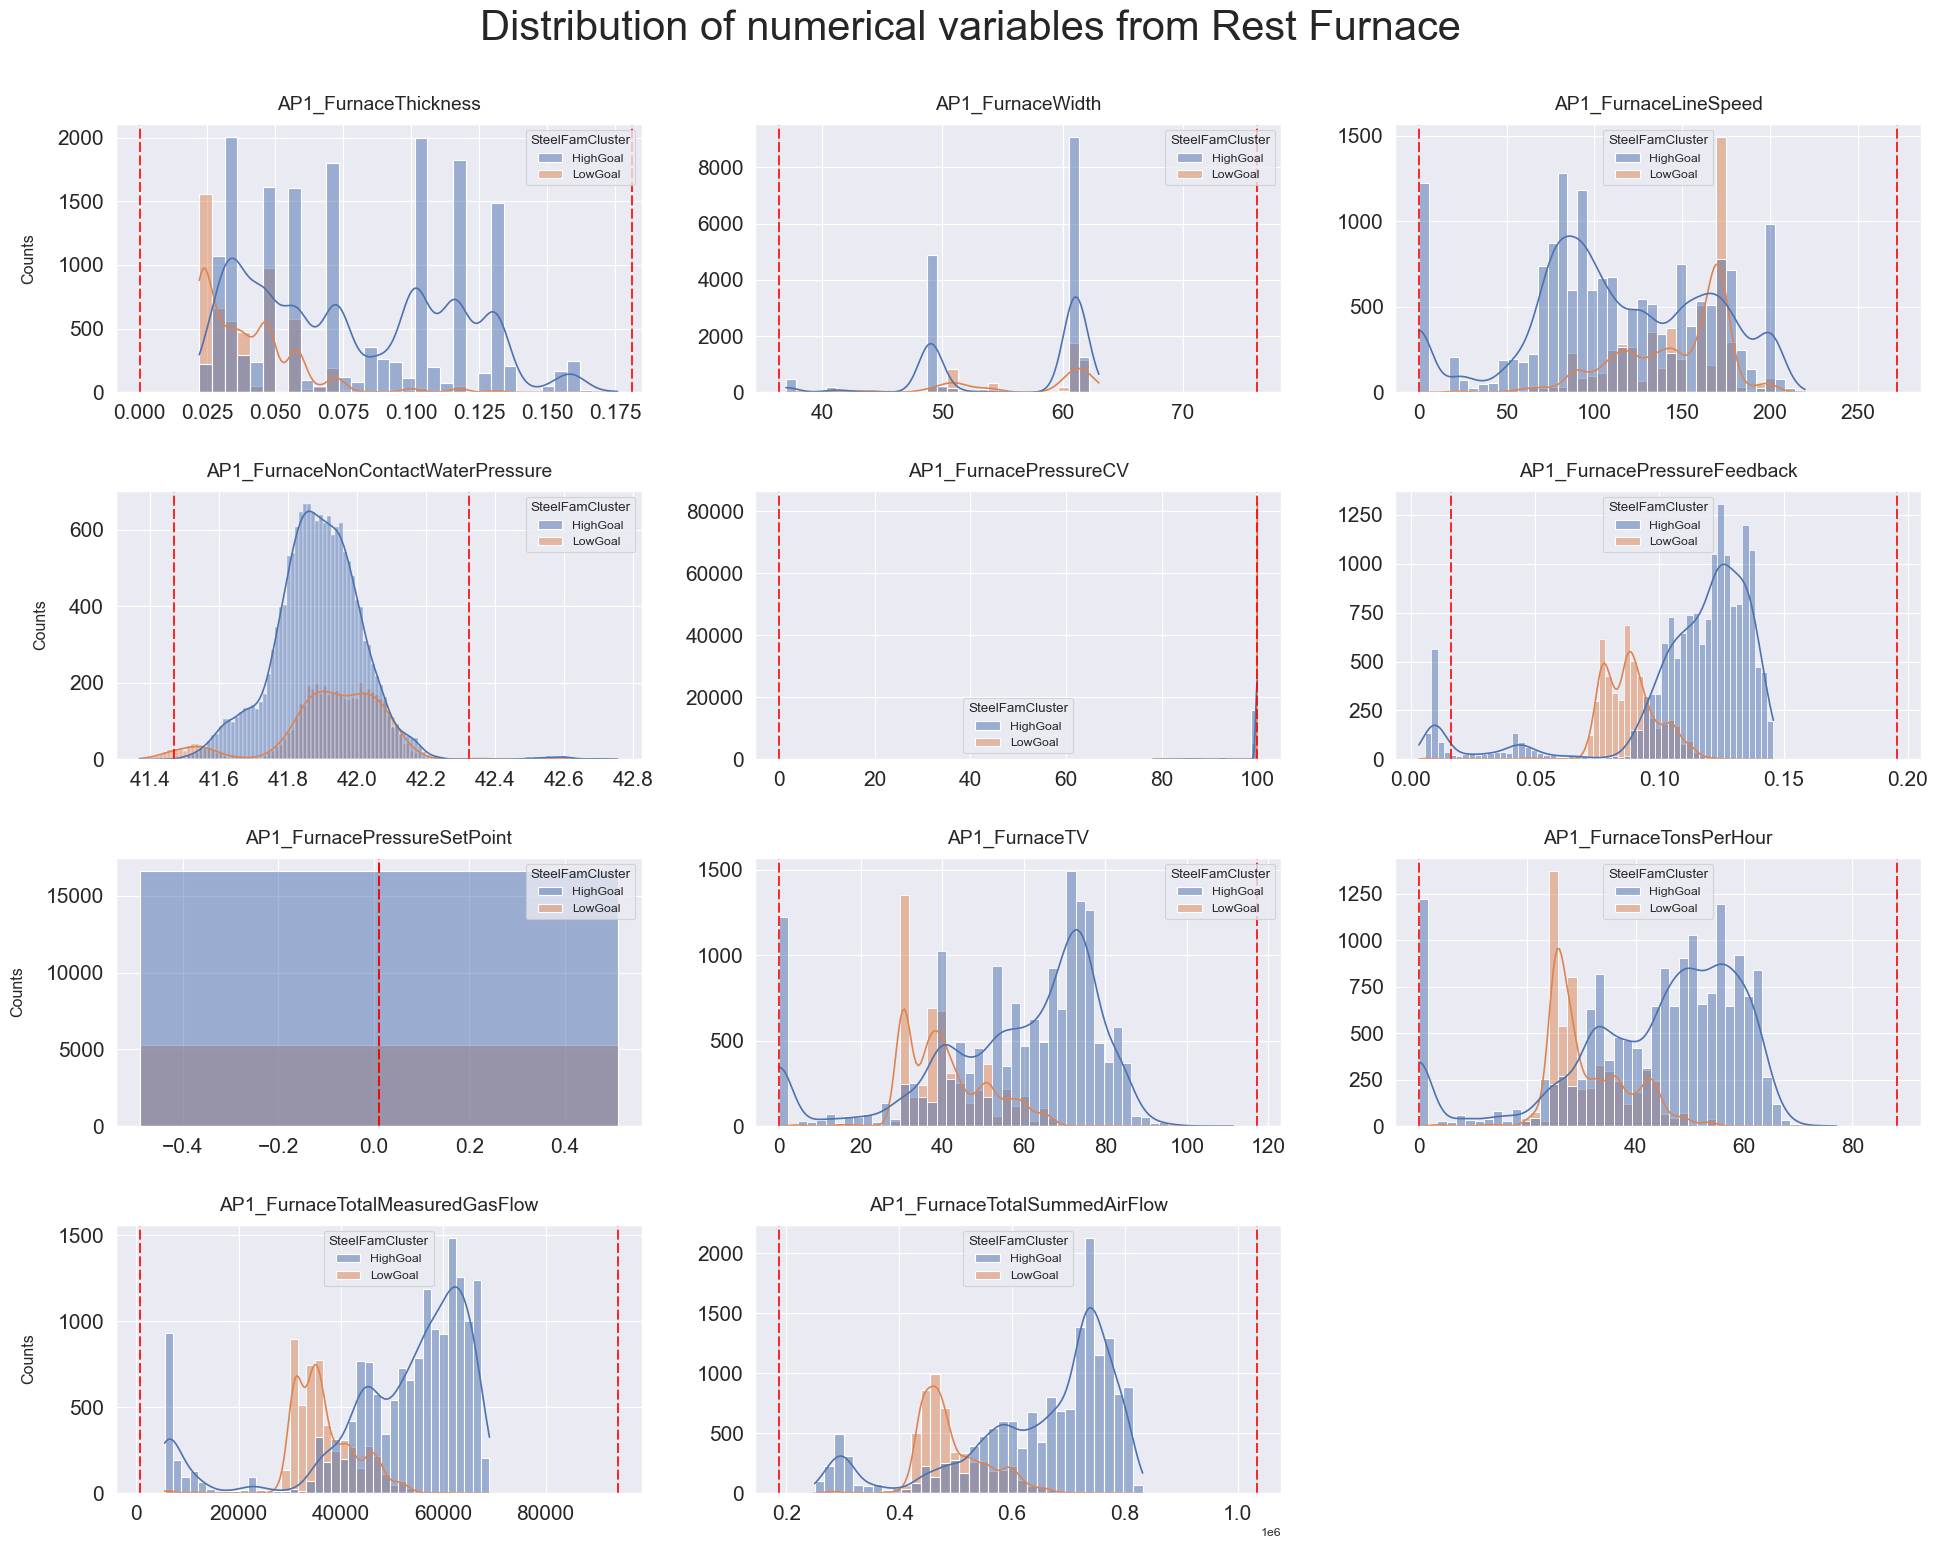

In [27]:
#Plot rest vars: 11 vars
func_hist_plot_rest(vars_series=rest_vars_series,title="Rest Furnace",ncol=3,hue="SteelFamCluster",colour="fuchsia")

In [28]:
#AP1_FurnacePressureSetPoint is cte
dfXY[["AP1_FurnacePressureSetPoint","AP1_FurnacePressureCV"]].apply(pd.Series.value_counts,axis=0)

AP1_FurnacePressureSetPoint  AP1_FurnacePressureCV
0.010000                        21907.0                    NaN
78.149429                           NaN                    1.0
78.224686                           NaN                    1.0
78.719246                           NaN                    1.0
78.737602                           NaN                    1.0
...                                 ...                    ...
99.999336                           NaN                    1.0
99.999458                           NaN                    1.0
99.999504                           NaN                    1.0
99.999710                           NaN                    1.0
100.000000                          NaN                21068.0

[839 rows x 2 columns]

## C.2 Categorical features

In [30]:
# Values check with .unique()
# 
# Grouped by record counts/bar charts
# 
# Split distribution charts of associated numeric features

In [42]:
#Categorical vars
categorical_var=dfXY[dfXY.columns[dfXY.dtypes == "category"]].columns.to_list()
print(len(categorical_var))
categorical_var

11


['AP1_FurnaceWeldInFurnace',
 'AP1_FurnaceZone1TurndownOn',
 'AP1_FurnaceZone2TurndownOn',
 'AP1_FurnaceZone3TurndownOn',
 'AP1_FurnaceZone4TurndownOn',
 'AP1_FurnaceZone5TurndownOn',
 'AP1_FurnaceZone6TurndownOn',
 'AP1_FurnaceZone7TurndownOn',
 'AP1_FurnaceZone8TurndownOn',
 'grade',
 'SteelFamCluster']

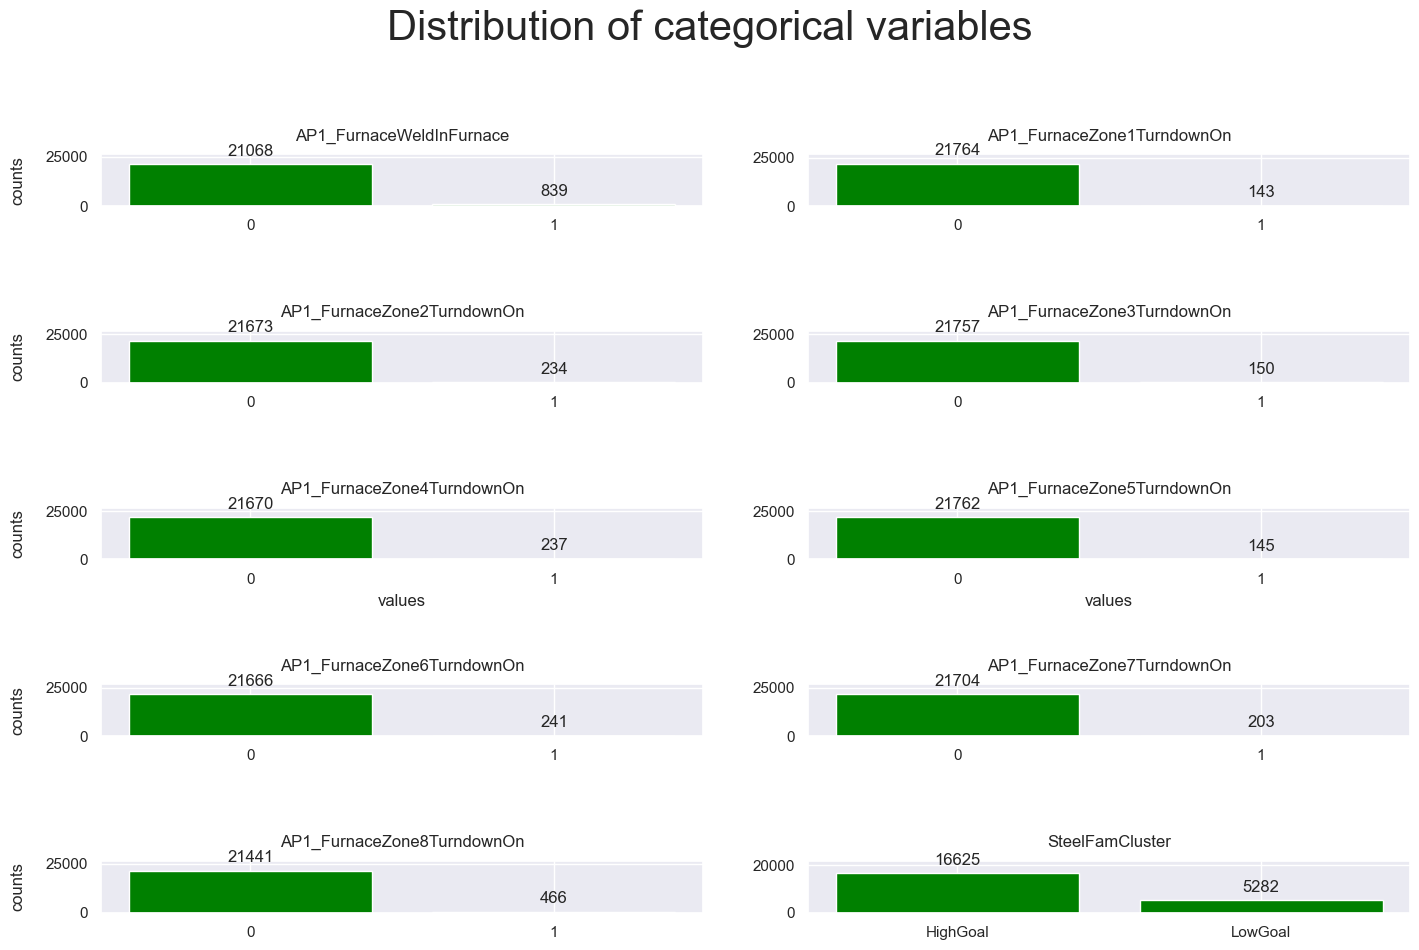

In [51]:
#Barplot for AP_1 vars
nrow=5#3
ncol=2#3
var=0
fig, axes = plt.subplots(nrow, ncol,figsize=(15,10))

for r in range(nrow):
    for c in range(ncol):
        if categorical_var[var]=="grade":
            var+=1
        if var<len(categorical_var) and categorical_var[var]!="grade":
            #print(categorical_var[var])
            #plt.subplot_tool()
            #bar=dfXY.loc[:,categorical_var[var]].value_counts().plot(kind="bar",ax=axes[r,c],figsize=(15,10),rot=0,color="green",xlabel='')#,title=var
            counts=dfXY.loc[:,categorical_var[var]].value_counts().values#to make it a list
            values=dfXY.loc[:,categorical_var[var]].value_counts().index.astype(str).values
            bar=axes[r,c].bar(x=values,height=counts,color="green")
            axes[r,c].set_title(label=categorical_var[var],loc='center',pad=10)
            axes[r,c].bar_label(bar,padding=4)
            axes[r,c].set_ylim(top=max(counts)+5000)
            if c==0:
                axes[r,c].set_ylabel(ylabel="counts",labelpad=15)
            if r==2:
                axes[r,c].set_xlabel(xlabel="values",labelpad=5)
        #print(categorical_var[var],var,var==len(categorical_var))
        var+=1
#Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axes.flat:
#    ax.label_outer()

#Make space between subplots
fig.suptitle("Distribution of categorical variables",fontsize=30)
sns.set(font_scale=1)
fig.tight_layout(pad=3)
#Other way
# set the spacing between subplots
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.4, 
#                     hspace=0.4)

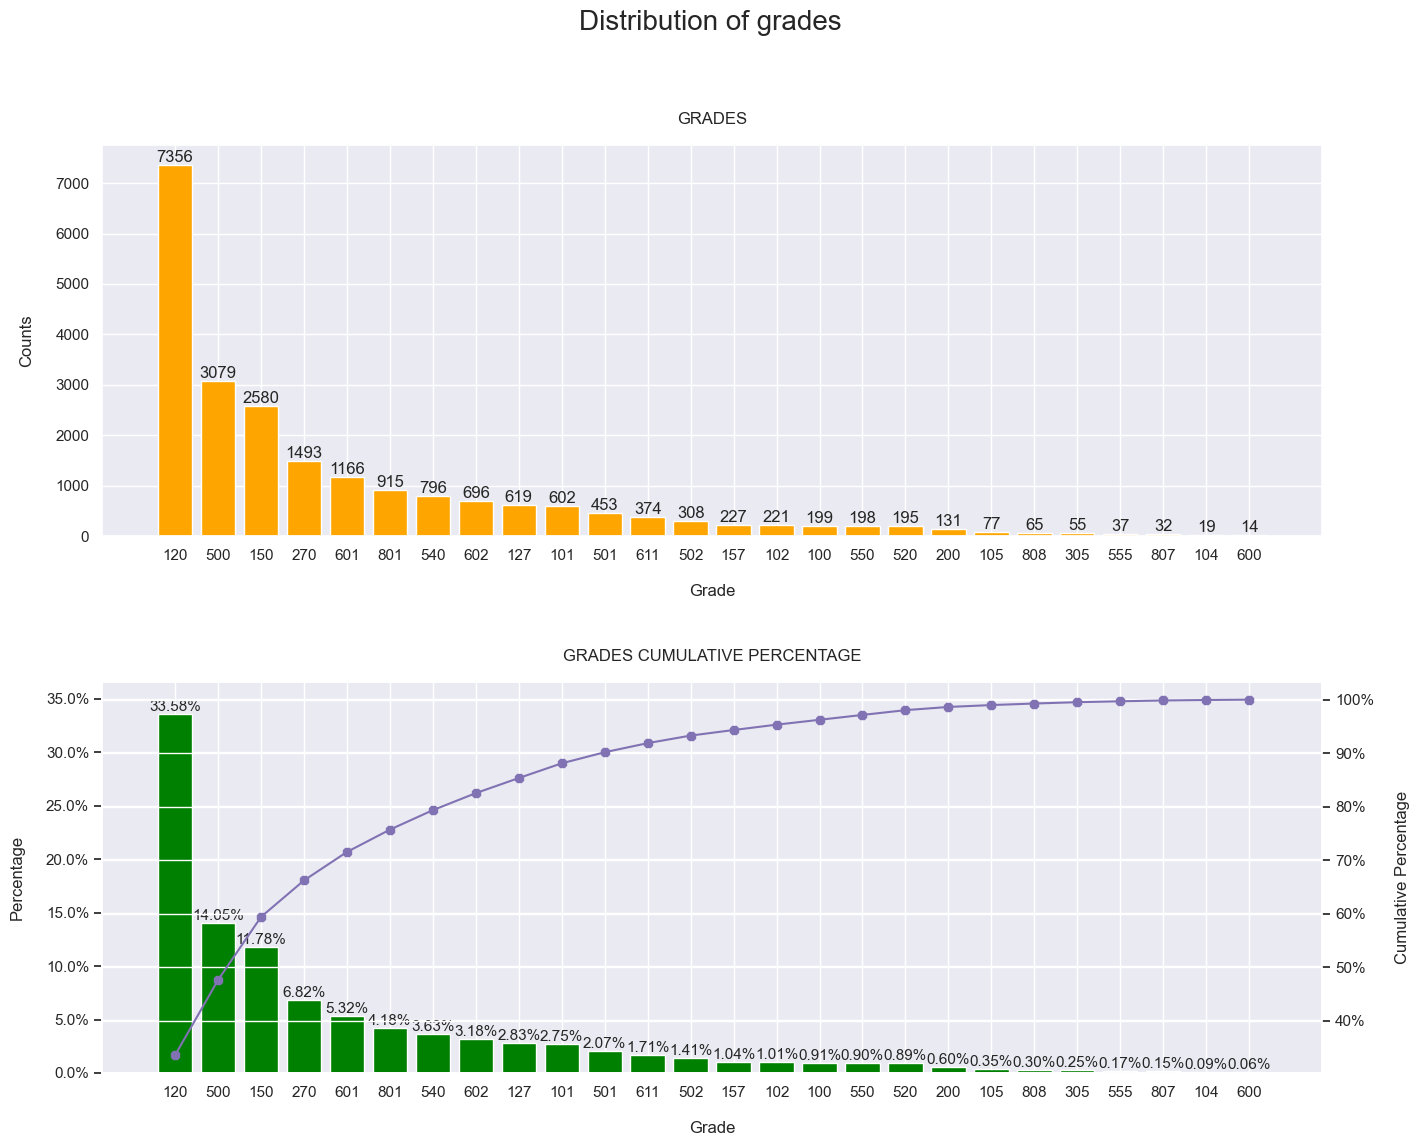

In [33]:
#Plot grades
#ax = dfXY.loc[:,"grade"].value_counts().plot(kind="bar",figsize=(20,5),title="GRADES",color="orange",rot=0)
fig,axes = plt.subplots(2,1,figsize=(15,12))
fig.suptitle("Distribution of grades",fontsize=20)
#sns.set_style(style='whitegrid')
#Barplot grades
values = dfXY.loc[:,"grade"].value_counts().index.astype(str).values
counts = dfXY.loc[:,"grade"].value_counts().values
bar_container = axes[0].bar(x=values,height=counts,color="orange")
axes[0].set_title(label="GRADES",pad=15)
axes[0].set_ylabel(ylabel="Counts",labelpad=15)
axes[0].set_xlabel(xlabel="Grade",labelpad=15)
axes[0].bar_label(container=bar_container,fontsize=12)
axes[0].set_ylim(top=max(counts)+400)
#Barplot cumpercentage grades
Percentage = np.round(counts/counts.sum()*100,2)
CumPercentage = np.round(counts.cumsum()/counts.sum()*100,2)
bar_containerPG = axes[1].bar(x=values,height=Percentage,color="green")
#%
axes[1].yaxis.set_major_formatter(PercentFormatter())
axes[1].set_title(label="GRADES CUMULATIVE PERCENTAGE",pad=15)
axes[1].set_ylabel(ylabel="Percentage",labelpad=15)
axes[1].set_xlabel(xlabel="Grade",labelpad=15)
axes[1].bar_label(container=bar_containerPG,fmt='%.2f%%',fontsize=11)
axes[1].set_ylim(top=max(Percentage)+3)
#Cum%
axcum=axes[1].twinx()
axcum.plot(values, CumPercentage, marker = '8', color = 'm',linestyle='solid')
axcum.yaxis.set_major_formatter(PercentFormatter())
axcum.set_ylabel(ylabel="Cumulative Percentage",labelpad=15)

#sns.set(font_scale=1)
fig.tight_layout(pad=3)

In [34]:
dfXY.loc[:,"grade"].value_counts().values
Percentage
CumPercentage

array([ 33.58,  47.63,  59.41,  66.23,  71.55,  75.72,  79.36,  82.54,
        85.36,  88.11,  90.18,  91.88,  93.29,  94.33,  95.33,  96.24,
        97.15,  98.04,  98.64,  98.99,  99.28,  99.53,  99.7 ,  99.85,
        99.94, 100.  ])

## Group analysis

In [ ]:
# Correlation plot analysis
# 
# Pairplot analysis (seaborn package has a really good plot for this)

# Observation summary

Record high level comments about what you discovered